## New York City Traffic Speed Detectors

<div class="alert alert-info"><strong> Speed Data:</strong> This data feed contains 'real‐time' traffic information from locations where NYCDOT has installed
sensors, mostly on major arterials and highways within the City limits. NYCDOT uses this
information for emergency response and management</a>.</div>

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

sns.set_style('white')
sns.set_context("paper", font_scale=1.4)  
%matplotlib inline

In [2]:
import psutil
svmem = psutil.virtual_memory()
print(svmem.available/(1000000000))

23.229165568


In [3]:
import os 
# only one file dataset:
os.path.getsize('DOT_Traffic_Speeds_NBE.csv')/(1000000000)

12.084299156

In [8]:
df=pd.read_csv('DOT_Traffic_Speeds_NBE.csv',nrows=10)
name=df.columns

print(df.memory_usage(index=True).sum())
import sys
sys.getsizeof(df)

1120


8407

### Select Manhattan
#### Filter based on column value in Python

In [10]:
import csv
temp = r'C:\Users\Ali\Traffic\DOT_Traffic_Speeds_NBE.csv'


with open(temp, 'r', newline='') as f:
    cr = csv.reader(f, delimiter=',')
    # next(cr) gets the header row (row[0])
    i = next(cr).index('BOROUGH')
    # list comprehension through remaining cr iterables
    filtered = [row for row in cr if row[i] == 'Manhattan']

In [11]:
len(filtered)

5420106

In [12]:
df = pd.DataFrame(filtered, columns=name) 
df=df.loc[:,['ID','SPEED','TRAVEL_TIME','DATA_AS_OF','BOROUGH','LINK_ID','LINK_POINTS','LINK_NAME']]
df.head()

,ID,SPEED,TRAVEL_TIME,DATA_AS_OF,BOROUGH,LINK_ID,LINK_POINTS,LINK_NAME
0,2,0.00,0,08/17/2019 09:59:10 PM,Manhattan,4616325,"40.73933,-74.01004 40.73895,-74.01012 40.7376,...",11th ave s ganservoort - west st @ spring st
1,223,35.41,74,08/17/2019 09:59:10 PM,Manhattan,4616341,"40.70908,-73.9959 40.70895,-73.996941 40.70882...",FDR S Catherine Slip - BKN Bridge Manhattan Side
2,150,0.00,0,08/17/2019 09:59:10 PM,Manhattan,4616340,"40.7016405,-73.991121 40.70158,-73.99033 40.70...",BQE N Atlantic Ave - MAN Bridge Manhattan Side
3,217,24.23,423,08/17/2019 09:59:10 PM,Manhattan,4616328,"40.71141,-73.97866 40.712,-73.97793 40.712661,...",FDR N Catherine Slip - 25th St
4,221,35.41,287,08/17/2019 09:59:10 PM,Manhattan,4616333,"40.736971,-73.97477 40.73651,-73.975011 40.735...",FDR S 25th St - Catherine Slip


In [13]:
print(df.shape)
df.info()

(5420106, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5420106 entries, 0 to 5420105
Data columns (total 8 columns):
ID             object
SPEED          object
TRAVEL_TIME    object
DATA_AS_OF     object
BOROUGH        object
LINK_ID        object
LINK_POINTS    object
LINK_NAME      object
dtypes: object(8)
memory usage: 330.8+ MB


In [14]:
df['datetime']=pd.to_datetime(df.DATA_AS_OF,infer_datetime_format=True)
del df['DATA_AS_OF']
df[['ID','SPEED','TRAVEL_TIME','LINK_ID']] = df[['ID','SPEED','TRAVEL_TIME','LINK_ID']].apply(pd.to_numeric)
del df['BOROUGH']

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5420106 entries, 0 to 5420105
Data columns (total 7 columns):
ID             int64
SPEED          float64
TRAVEL_TIME    int64
LINK_ID        int64
LINK_POINTS    object
LINK_NAME      object
datetime       datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 289.5+ MB


In [16]:
df.to_csv('Manhattan.csv')

## Import Modified Data - Manhattan

In [ ]:
df1=pd.read_csv('Manhattan.csv')
df1['datetime']=pd.to_datetime(df1['datetime'],infer_datetime_format=True)
del df1['Unnamed: 0']
df1.head(2)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5420106 entries, 0 to 5420105
Data columns (total 7 columns):
ID             int64
SPEED          float64
TRAVEL_TIME    int64
LINK_ID        int64
LINK_POINTS    object
LINK_NAME      object
datetime       datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 289.5+ MB


In [6]:
print('Unique Link Names: ',df1.LINK_NAME.nunique())
print('Unique IDs: ',df1.ID.nunique())
print('Unique LINK_POINTS: ',df1.LINK_POINTS.nunique())

Unique Link Names:  35
Unique IDs:  35
Unique LINK_POINTS:  35


In [7]:
df1.ID.value_counts()

1      210734
3      210699
2      210685
4      210672
145    210644
150    210641
450    210428
149    210313
223    210063
215    210014
106    209680
222    209653
221    209416
217    208847
448    208741
330    208574
325    208450
399    208401
265    207967
364    207262
213    207242
324    206680
329    205961
445    203769
119    202526
124    202026
224         2
443         2
225         2
444         2
123         2
122         2
446         2
447         2
442         2
Name: ID, dtype: int64

In [8]:
# Remove Link IDs with low counts
df1=df1.groupby('ID').filter(lambda x : len(x)>10)
df1.ID.value_counts()

1      210734
3      210699
2      210685
4      210672
145    210644
150    210641
450    210428
149    210313
223    210063
215    210014
106    209680
222    209653
221    209416
217    208847
448    208741
330    208574
325    208450
399    208401
265    207967
364    207262
213    207242
324    206680
329    205961
445    203769
119    202526
124    202026
Name: ID, dtype: int64

### MEAN SPEED & STD DEV FOR LINK IDs - NYC REAL TIME TRAFFIC SPEED

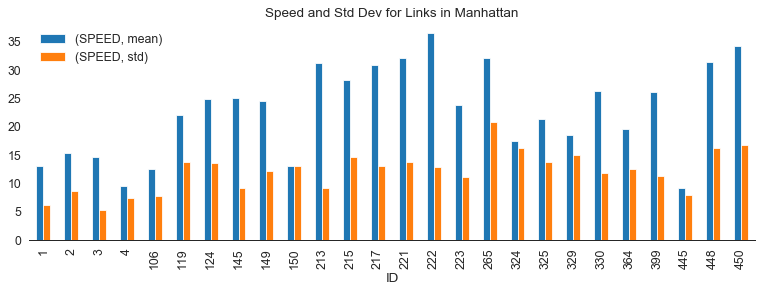

In [10]:
#dfg=df1.groupby('ID').agg({'SPEED':[np.mean,np.std],'TRAVEL_TIME':[np.mean,np.std]})
dfg=df1.groupby('ID').agg({'SPEED':[np.mean,np.std]})
dfg.plot(kind='bar', figsize=(13,4));
sns.despine(left=True)
plt.legend(frameon=False)
plt.title('Speed and Std Dev for Links in Manhattan');

### LINK ID 3

In [11]:
dfs=df1[df1['ID']==3]
dfs.reset_index(inplace=True)
print(dfs.shape)
dfs.head(2)

(210699, 8)


,index,ID,SPEED,TRAVEL_TIME,LINK_ID,LINK_POINTS,LINK_NAME,datetime
0,14,3,14.91,419,4616324,"40.76375,-73.999191 40.763521,-73.99935 40.762...",12th ave @ 45th - 11 ave ganservoort st,2019-08-17 21:59:05
1,40,3,15.53,407,4616324,"40.76375,-73.999191 40.763521,-73.99935 40.762...",12th ave @ 45th - 11 ave ganservoort st,2019-08-17 21:56:04


In [12]:
print( dfs.LINK_NAME[:1])

print('Starting Date : ',dfs.datetime.min())
print('End Date      : ',dfs.datetime.max())
print('Total Days    : ',dfs.datetime.max()-dfs.datetime.min())
print('\033[1m' + '\nSpeed Statistics for LINK ID 3')
dfs.SPEED.describe()

0    12th ave @ 45th - 11 ave ganservoort st
Name: LINK_NAME, dtype: object
Starting Date :  2017-05-05 09:46:49
End Date      :  2019-08-17 21:59:05
Total Days    :  834 days 12:12:16

Speed Statistics for LINK ID 3


count    210699.000000
mean         14.653151
std           5.244722
min           0.000000
25%          11.180000
50%          14.290000
75%          18.010000
max         131.110000
Name: SPEED, dtype: float64

### Camera Coordinates - Latitude and Longitude

In [13]:
pd.options.display.max_colwidth=700
print(dfs.LINK_POINTS[:1])
pd.options.display.max_colwidth=60

0    40.76375,-73.999191 40.763521,-73.99935 40.7620804,-74.00136 40.75985,-74.00306 40.75775,-74.00457 40.75775,-74.00457 40.75576,-74.00601 40.7544904,-74.006921 40.7538404,-74.007241 40.75415,-74.00712 40.7502804,-74.00848 40.74833,-74.007771 40.74114,-74.0
Name: LINK_POINTS, dtype: object


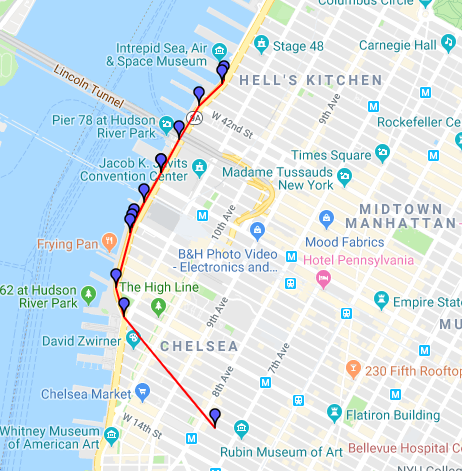

In [14]:
from IPython.display import Image
PATH = "/Users/Ali/Traffic/"
Image(filename = PATH + "Map.png", width=450, height=200)

**Average Monthly Speed**

In [25]:
dfa.head(2)

,index,ID,SPEED,TRAVEL_TIME,LINK_ID,LINK_POINTS,LINK_NAME,datetime
datetime,,,,,,,,
2019-08-17 21:59:05,14,3,14.91,419,4616324,"40.76375,-73.999191 40.763521,-73.99935 40.7620804,-74.0...",12th ave @ 45th - 11 ave ganservoort st,2019-08-17
2019-08-17 21:56:04,40,3,15.53,407,4616324,"40.76375,-73.999191 40.763521,-73.99935 40.7620804,-74.0...",12th ave @ 45th - 11 ave ganservoort st,2019-08-17


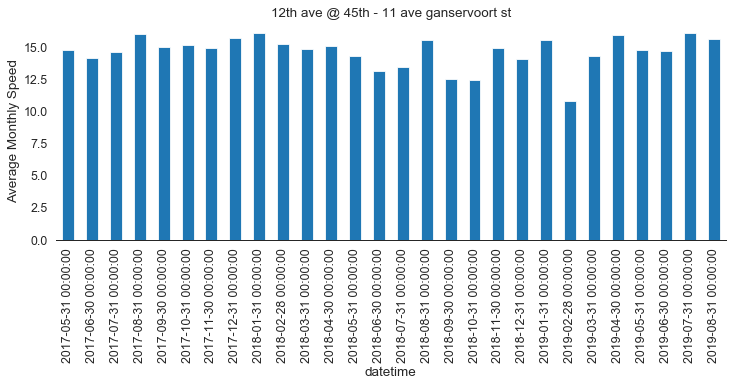

In [27]:
dfa=dfs.set_index(dfs.datetime)
dfa['SPEED'].resample('M').mean().plot.bar(figsize=(12,4),
                                           color=['#1f77b4'],
                                           title='12th ave @ 45th - 11 ave ganservoort st');
plt.ylabel('Average Monthly Speed')
sns.despine(left=True)

In [28]:
dfa=dfs.set_index(dfs.datetime)
dfa=dfa.loc[:,['SPEED']]
dfa=dfa.sort_values(by='datetime')
dfa.head()

,SPEED
datetime,
2017-05-05 09:46:49,8.7
2017-05-05 09:51:49,8.7
2017-05-05 09:56:50,8.7
2017-05-05 10:01:50,8.7
2017-05-05 10:06:50,8.7


### Value Counts by Time Series Resolution

In [29]:
res = (pd.Series(dfa.index[1:]) - pd.Series(dfa.index[:-1])).value_counts()
print('\033[1m' +'Total Intervals Found: ',len(res))
res

Total Intervals Found:  564


0 days 00:05:00    84021
0 days 00:05:01    36365
0 days 00:04:59    35147
0 days 00:05:02     7545
0 days 00:04:58     6945
0 days 00:06:00     5217
0 days 00:04:00     5034
0 days 00:05:03     2256
0 days 00:04:57     2173
0 days 00:06:01     1703
0 days 00:05:59     1681
0 days 00:04:01     1670
0 days 00:03:59     1628
0 days 00:04:56     1006
0 days 00:05:04      983
0 days 00:04:55      638
0 days 00:05:05      586
0 days 00:03:00      585
0 days 00:10:00      489
0 days 00:04:54      442
0 days 00:05:06      429
0 days 00:07:00      420
0 days 00:04:53      360
0 days 00:04:52      342
0 days 00:05:07      328
0 days 00:05:08      311
0 days 00:04:50      294
0 days 00:04:51      265
0 days 00:05:10      263
0 days 00:05:09      252
                   ...  
2 days 01:50:03        1
0 days 00:02:53        1
0 days 00:16:52        1
0 days 00:11:58        1
0 days 01:04:59        1
0 days 00:08:53        1
0 days 00:10:42        1
0 days 01:18:58        1
0 days 21:15:50        1


In [31]:
# TimeIndex for the max difference
idx1=pd.Index(dfa.index[1:])
idx2=pd.Index(dfa.index[:-1])
ss=idx1-idx2
print(ss.argmax())

6622


In [32]:
print(idx1[6621],idx1[6622])
print(idx1[6621]-idx1[6622])

2017-07-27 21:02:48 2017-08-03 14:01:10
-7 days +07:01:38


https://gist.github.com/neocortex/5d962742ef16b072dee9a04d9015f85d

### Count of Values less then equal to Zero

In [33]:
dft=dfa.copy(deep=True)
print('Total Records: ',len(dft))
print('Zero Values: ',len(dft[dft.SPEED<=0]))

Total Records:  210699
Zero Values:  1798


**Histogram of Zero Speed Values**

In [35]:
gg=dft[dft.SPEED<=0]
hour=gg.index.hour
gg.loc[:,'hour'] = hour

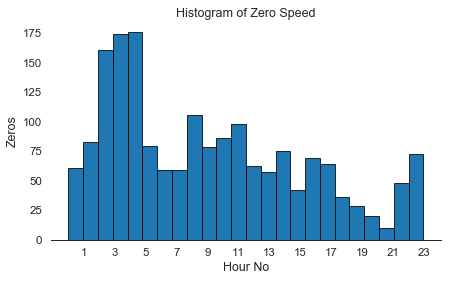

In [36]:
from pylab import hist, show, xticks
sns.set_context("paper", font_scale=1.3)  
gg['hour'].hist(bins=24, figsize=(7,4),grid=False, edgecolor = 'black',)
sns.despine(left=True)
xticks(range(1,24,2))
plt.title('Histogram of Zero Speed')
plt.xlabel('Hour No')
plt.ylabel('Zeros');

## Missing Value Fill & Regularizing Uneven Timeseries 
1.  Regularizing uneven Timeseries
2.  Forward Fill & Backward Filling
3. Imputing Missing values with values one week before

In [37]:
dft=dfa.copy(deep=True)
#print(len(dft[dft.SPEED<=0]))
hour=dft.index.hour
dft.loc[:,'hour'] = hour

**1. Regularizing uneven Timeseries**

In [38]:
import traces
import datetime
from datetime import timedelta
ts = traces.TimeSeries(data=dft.SPEED)

regularized = ts.moving_average(
    sampling_period=900,window_size=4,
    placement='left',
)
len(dft),len(regularized)

(210699, 80113)

In [39]:
df3 = pd.DataFrame(regularized,columns=['datetime','speed'])
df3.set_index('datetime', inplace=True)

res = (pd.Series(df3.index[1:]) - pd.Series(df3.index[:-1])).value_counts()
print('Total Intervals Found: ',len(res))
print(res)
df3.head()

Total Intervals Found:  1
00:15:00    80112
Name: datetime, dtype: int64


,speed
datetime,
2017-05-05 09:46:49,8.700
2017-05-05 10:01:49,8.700
2017-05-05 10:16:49,8.700
2017-05-05 10:31:49,8.700
2017-05-05 10:46:49,8.545


In [40]:
print('Total Zeros after Regularizing: ',len(df3[df3['speed']<=0]))
print('Hour > 5 and Speed equals Zero:', len(dft[(dft['hour']>5)& (dft['SPEED']==0)]))

Total Zeros after Regularizing:  689
Hour > 5 and Speed equals Zero: 1068


**2. Forward Fill & Backward Filling**

In [41]:
hour=df3.index.hour
df3.loc[:,'hour'] = hour
df3.loc[df3['hour'] > 5, 'speed'] = df3['speed'].replace(to_replace=0, method='ffill', limit=3)
df3.loc[df3['hour'] > 5, 'speed'] = df3['speed'].replace(to_replace=0, method='bfill', limit=2)

In [42]:
print('Total Zeros after B-fill and F-Fill: ',len(df3[df3['speed']<=0]))
print('Hour > 5 and Speed equals 0:',len(df3[(df3['hour']>5)& (df3['speed']==0)]))

Total Zeros after B-fill and F-Fill:  373
Hour > 5 and Speed equals 0: 118


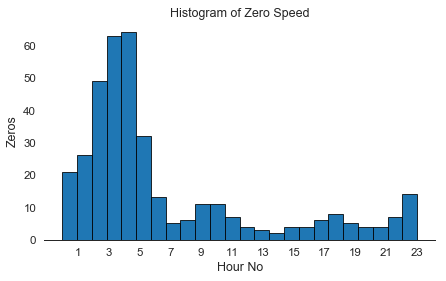

In [43]:
from pylab import hist, show, xticks
gg=df3[df3.speed<=0]
gg['hour'].hist(bins=24, figsize=(7,4),grid=False, edgecolor = 'black',)
sns.despine(left=True)
xticks(range(1,24,2))
plt.title('Histogram of Zero Speed')
plt.xlabel('Hour No')
plt.ylabel('Zeros');

**3. Imputing Missing values with one week before**

In [44]:
#df3 = df3.drop('hour', axis=1)
ss=(df3.index[(df3['hour']>5)& (df3['speed']<=0)])-timedelta(days=7)
len(ss)
ab=df3.loc[df3.index.isin(ss)]['speed'].values
ab = np.reshape(ab, (-1, 1))
df3.loc[(df3['hour']>5)& (df3['speed']<=0), 'speed'] = ab

In [ ]:
'''df3 = df3.drop('hour', axis=1)
ss=(df3.index[df3['speed']<=0])-timedelta(days=7)
ab=df3.loc[df3.index.isin(ss)]['speed'].values
ab = np.reshape(ab, (-1, 1))
df3[df3['speed']<=0]=ab'''

In [45]:
print('Total Zeros after one week fill: ',len(df3[df3['speed']<=0]))
print('Zeros when Hour > 5 and Speed equals 0:',len(df3[(df3['hour']>5)& (df3['speed']==0)]))

Total Zeros after one week fill:  255
Zeros when Hour > 5 and Speed equals 0: 0


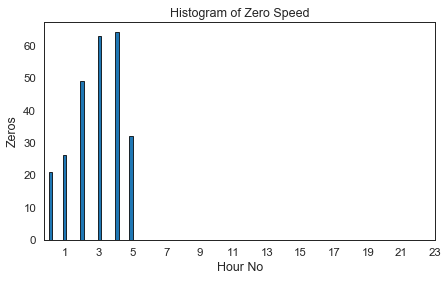

In [46]:
gg=df3[df3.speed<=0]
gg['hour'].hist(bins=24, figsize=(7,4),grid=False, edgecolor = 'black',)
#sns.despine(left=True)
xticks(range(1,24,2))
plt.title('Histogram of Zero Speed')
plt.xlabel('Hour No')
plt.ylabel('Zeros');

In [47]:
df3.head(2)

,speed,hour
datetime,,
2017-05-05 09:46:49,8.7,9
2017-05-05 10:01:49,8.7,10


In [48]:
df4=df3.iloc[:,0]
df4=pd.DataFrame(df4)
print(df4.shape)
df4.head(2)

(80113, 1)


,speed
datetime,
2017-05-05 09:46:49,8.7
2017-05-05 10:01:49,8.7


## Processed Data

In [ ]:
#df4.to_csv('Manhattan_Processed.csv')

In [2]:
df4=pd.read_csv('Manhattan_Processed.csv',parse_dates=True, index_col=0)
df4.head(2)

,speed
datetime,
2017-05-05 09:46:49,8.7
2017-05-05 10:01:49,8.7


In [5]:
print(df4.quantile(0.98))
#df4=df4[df4 < df4.quantile(.97)]

speed    24.23
Name: 0.98, dtype: float64


### Speed by Quarter and Months

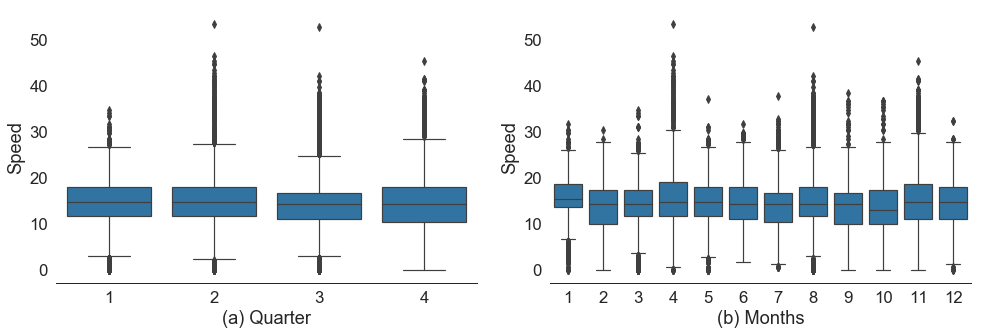

In [20]:
dfp=df4.copy(deep=True)
dfp['date']=dfp.index
dfp['quarter'] = dfp['date'].apply(lambda x: x.quarter)
dfp['month'] = dfp['date'].apply(lambda x: x.month)
sns.set_style('white')
sns.set_context("paper", font_scale=1.9)  
a=plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.subplots_adjust(wspace=0.2)
ax=sns.boxplot(x="quarter", y="speed", data=dfp, color='#1f77b4');
plt.ylabel('Speed')
plt.xlabel('(a) Quarter')
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
sns.despine(left=True);
plt.tight_layout() 

plt.subplot(1,2,2)
ax=sns.boxplot(x="month", y="speed", data=dfp, color='#1f77b4');
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.xlabel('(b) Months')
plt.ylabel('Speed')
sns.despine(left=True);
plt.tight_layout() 

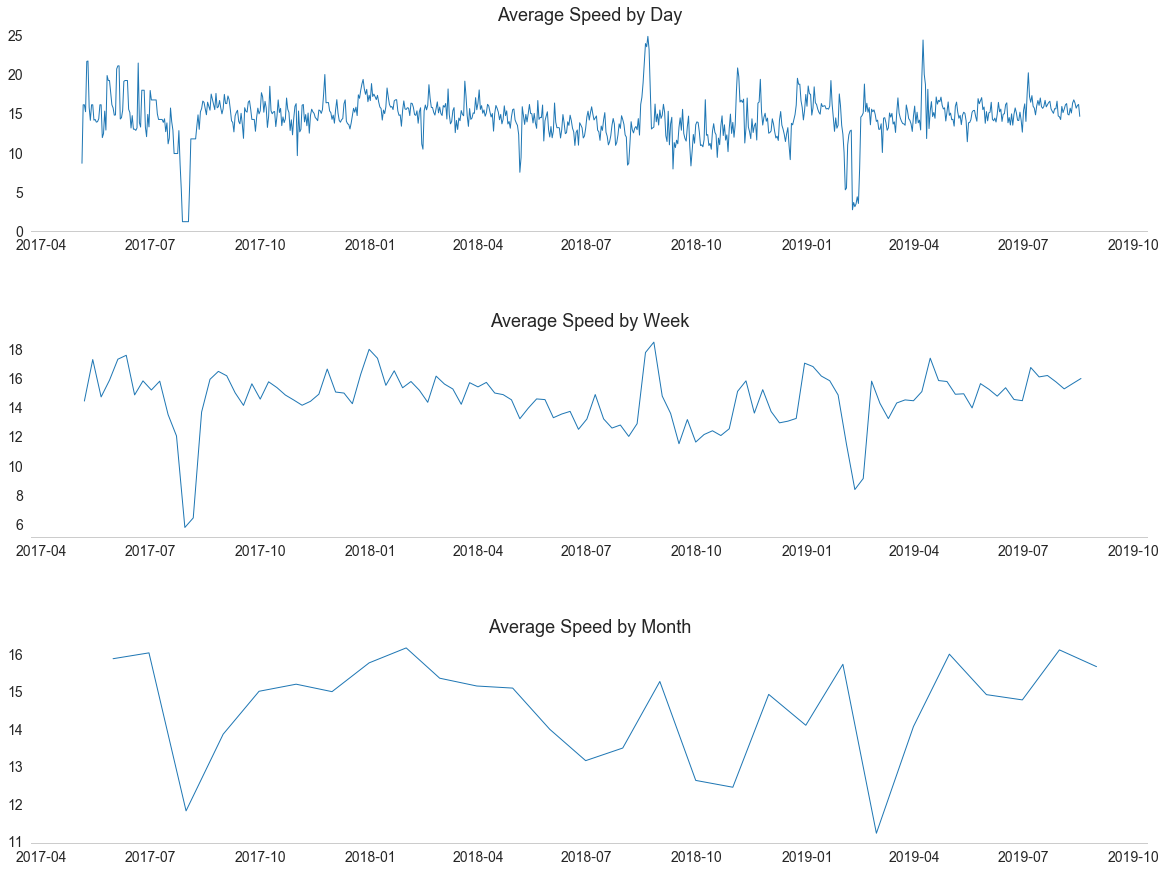

In [21]:
sns.set_style("whitegrid", {'axes.grid' : False})
fig = plt.figure(figsize=(20,15))
fig.subplots_adjust(hspace=.5)

ax1 = fig.add_subplot(3,1,1)
ax1.plot(dfp['speed'].resample('D').mean(),linewidth=1)
ax1.set_title('Average Speed by Day', fontsize=18)
#ax1.set_ylabel('Average Consumption', fontsize=14)
#ax1.set_xlabel('Day of Crime', fontsize=14)
ax1.tick_params(axis='both', which='major', labelsize=14)
sns.despine(left=True)

ax2 = fig.add_subplot(3,1,2, sharex=ax1)
ax2.plot(dfp['speed'].resample('W').mean(),linewidth=1)
ax2.set_title('Average Speed by Week', fontsize=18)
#ax2.set_ylabel('# of Crimes', fontsize=14)
#ax2.set_xlabel('Month of Crime', fontsize=14)
ax2.tick_params(axis='both', which='major', labelsize=14)
sns.despine(left=True)

ax3  = fig.add_subplot(3,1,3, sharex=ax1)
ax3.plot(dfp['speed'].resample('M').mean(),linewidth=1)
ax3.set_title('Average Speed by Month', fontsize=18)
#ax3.set_ylabel('# of Crimes', fontsize=14)
#ax3.set_xlabel('Year of Crime', fontsize=14)
ax3.tick_params(axis='both', which='major', labelsize=14)
sns.despine(left=True)

### Speed by Weekend & Weekday for Months

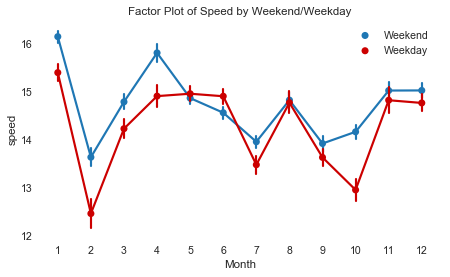

In [22]:
dfp["weekday"]=dfp.apply(lambda x: x["date"].weekday(),axis=1)
dfp["weekday"] = (dfp["weekday"] < 5).astype(int)
sns.set_style("whitegrid", {'axes.grid' : False})
dic={0:'Weekday',1:'Weekend'}
dfp['Day'] = dfp.weekday.map(dic)

sns.set_context("paper", font_scale=1.2)  
plt1=sns.catplot('month','speed',hue='Day',kind="point",data=dfp,
                 height=4,palette=["#1f77b4","#cc0000"], aspect=1.6, legend=False);                                                                                                                                                                                                                                                                                                                                             
plt.title('Factor Plot of Speed by Weekend/Weekday') 
plt.xlabel('Month')
sns.despine(left=True, bottom=True) 
plt.legend(loc='upper right', frameon=False)
plt.tight_layout();

## Weather Data

In [3]:
dfw=pd.read_csv('Manhattan_Weather.csv',index_col=0, parse_dates=True )
dfw.head(2)

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,sunrise,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
datetime,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,7,-2,0.0,9.7,2,0,20,10:55 AM,9:50 PM,8:46 AM,...,-4,16,0,55,0.0,1016,-2,10,115,8
2017-01-01 01:00:00,7,-2,0.0,9.7,2,0,20,10:55 AM,9:50 PM,8:46 AM,...,-5,18,7,56,0.0,1016,-2,10,127,9


In [4]:
upsampled = dfw.resample('15T')
dfw = upsampled.interpolate(method='linear')
print('Frequency of Speed Data: ',pd.infer_freq(df4.index))
print('Frequency of Weather Data: ',pd.infer_freq(dfw.index))

Frequency of Speed Data:  15T
Frequency of Weather Data:  15T


In [5]:
a=df4.index.min() #Speed DataFrame
b=df4.index.max()
print('Max and Min Speed Dates',a,b)

dfg=dfw[(dfw.index>=a)&(dfw.index<=b)]
print(len(df4),len(dfg))
dfg.index.min(),dfg.index.max()

Max and Min Speed Dates 2017-05-05 09:46:49 2019-08-17 21:46:49
80113 80112


(Timestamp('2017-05-05 10:00:00'), Timestamp('2019-08-17 21:45:00'))

**Perform an asof merge. This is similar to a left-join except that we
match on nearest key rather than equal keys**

In [6]:
dfsw=pd.merge_asof(df4, dfg, on='datetime')
print(dfsw.shape)
dfsw=dfsw.dropna(axis = 0, thresh=3)
print('Final Speed Weather Data Shape: ',dfsw.shape)

(80113, 26)
Final Speed Weather Data Shape:  (80112, 26)


In [7]:
# Dropping unnecessary Columns
dfsw=dfsw.drop(['maxtempC','mintempC','uvIndex','moonrise',
          'moonset','sunrise','sunset','uvIndex.1'],axis=1)
dfsw.columns

Index(['datetime', 'speed', 'totalSnow_cm', 'sunHour', 'moon_illumination',
       'DewPointC', 'FeelsLikeC', 'HeatIndexC', 'WindChillC', 'WindGustKmph',
       'cloudcover', 'humidity', 'precipMM', 'pressure', 'tempC', 'visibility',
       'winddirDegree', 'windspeedKmph'],
      dtype='object')

**Pandas Profiling**

In [142]:
import pandas_profiling as pp
pp.ProfileReport(dfws)

In [9]:
# Check Correlation of Speed with other variables
sp=dfsw[dfsw.columns[1:]].corr()['speed'][:]
sp

speed                1.000000
totalSnow_cm        -0.004918
sunHour             -0.026702
moon_illumination    0.044358
DewPointC           -0.048996
FeelsLikeC          -0.126551
HeatIndexC          -0.130282
WindChillC          -0.125298
WindGustKmph         0.061729
cloudcover           0.036324
humidity             0.210905
precipMM             0.033820
pressure             0.034994
tempC               -0.127908
visibility          -0.074366
winddirDegree        0.026396
windspeedKmph       -0.033409
Name: speed, dtype: float64

In [9]:
corr = dfsw.corr()
cmap = cmap=sns.diverging_palette(10, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "6pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "10pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '100px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '8pt'})\
    .set_caption("Hover to Magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,speed,totalSnow_cm,sunHour,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
speed,1,-0.0049,-0.027,0.044,-0.049,-0.13,-0.13,-0.13,0.062,0.036,0.21,0.034,0.035,-0.13,-0.074,0.026,-0.033
totalSnow_cm,-0.0049,1,-0.23,0.043,-0.13,-0.16,-0.16,-0.16,-0.011,0.17,0.1,0.038,0.065,-0.17,-0.16,-0.067,-0.059
sunHour,-0.027,-0.23,1,0.029,0.36,0.49,0.48,0.48,-0.056,-0.66,-0.31,-0.15,-0.16,0.48,0.25,0.047,-0.043
moon_illumination,0.044,0.043,0.029,1,-0.0043,0.0093,0.0083,0.012,0.023,-0.044,-0.05,-0.0064,-0.0062,0.012,0.069,-0.022,0.034
DewPointC,-0.049,-0.13,0.36,-0.0043,1,0.93,0.93,0.93,0.023,-0.059,0.23,0.13,-0.65,0.93,-0.037,-0.15,0.073
FeelsLikeC,-0.13,-0.16,0.49,0.0093,0.93,1,1,1,-0.015,-0.23,-0.12,0.06,-0.61,1,0.049,-0.11,0.09
HeatIndexC,-0.13,-0.16,0.48,0.0083,0.93,1,1,0.99,0.016,-0.22,-0.14,0.058,-0.61,1,0.048,-0.11,0.13
WindChillC,-0.13,-0.16,0.48,0.012,0.93,1,0.99,1,-0.018,-0.23,-0.13,0.06,-0.61,1,0.049,-0.11,0.085
WindGustKmph,0.062,-0.011,-0.056,0.023,0.023,-0.015,0.016,-0.018,1,0.059,0.0065,0.095,-0.33,0.013,-0.011,0.12,0.85
cloudcover,0.036,0.17,-0.66,-0.044,-0.059,-0.23,-0.22,-0.23,0.059,1,0.45,0.25,-0.044,-0.22,-0.3,-0.13,0.11


## Machine Learning Modeling
### XGBoost - Random Forest - Speed Only

In [69]:
data=df4.copy(deep=True)

for obs in range(1,31):
    data["S_" + str(obs)] = data.speed.shift(obs)
data.dropna(inplace=True)
#df.fillna(0.00,inplace=True)


X = data.iloc[:,:]
X=X.drop('speed',axis=1)
names=X.columns
X=X.values
y = data.loc[:,'speed']
y=y.values

train_size = int(len(data) * (0.98))
test_size = len(data) - train_size

X_train, X_test = X[0:train_size,:], X[train_size:len(data),:]
y_train, y_test = y[0:train_size], y[train_size:len(data)]

# Scaling Features
scaler= MinMaxScaler(feature_range=(0,1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((78481, 30), (78481,), (1602, 30), (1602,))

In [70]:
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb 
#regressor=RandomForestRegressor(n_estimators=50,random_state=0)
model = xgb.XGBRegressor(n_estimators = 100,max_depth=5)
model.fit(X_train,y_train)

[17:37:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

**Import Error Metrics**

In [48]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
def MAPError(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean((np.abs(y_true - y_pred)) / (y_true+0.000001)) 

def smape(A, F):
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

In [71]:
# Invert predictions and Reshape

trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

#trainPredict = regressor.predict(X_train)
#testPredict = regressor.predict(X_test)


# Metrics
print('\n---MAE---')
print('MAE Test: ',mean_absolute_error(y_test[:24], testPredict[:24]))
print('MAE Test: ',mean_absolute_error(y_test[:96], testPredict[:96]))
print('MAE Test: ',mean_absolute_error(y_test[:144], testPredict[:144]))

# Metrics
print('\n---RMSE---')
print('RMSE Test: ',np.sqrt(mean_squared_error(y_test[:24], testPredict[:24])))
print('RMSE Test: ',np.sqrt(mean_squared_error(y_test[:96], testPredict[:96])))
print('RMSE Test: ',np.sqrt(mean_squared_error(y_test[:144], testPredict[:144])))


# Metrics
print('\n---CV(RMSE)---')
print('CV(RMSE) Test: ',
      (np.sqrt(mean_squared_error(y_test[:24], testPredict[:24])))/(np.mean(y_test[:24])))
print('CV(RMSE) Test: ',
      (np.sqrt(mean_squared_error(y_test[:96], testPredict[:96])))/(np.mean(y_test[:96])))
print('CV(RMSE) Test: ',
      (np.sqrt(mean_squared_error(y_test[:144], testPredict[:144])))/(np.mean(y_test[:144])))


---MAE---
MAE Test:  2.3525254933039346
MAE Test:  1.4850793874263761
MAE Test:  1.4943049422899881

---RMSE---
RMSE Test:  3.603149699773949
RMSE Test:  2.208907884842322
RMSE Test:  2.160722947403951

---CV(RMSE)---
CV(RMSE) Test:  0.27898952379202085
CV(RMSE) Test:  0.15623768249625195
CV(RMSE) Test:  0.14850116904882468


The predicted regression target of an input sample is computed as the
mean predicted regression targets of the trees in the forest.

In [67]:
# Time Series cross-Validator
from sklearn.model_selection import TimeSeriesSplit
time_split = TimeSeriesSplit(n_splits=2)

**Grid Search CV**

In [204]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
rf = RandomForestRegressor()

param_grid = {
    'n_estimators': [2,4],
    'max_features': ["auto", "sqrt"],
    'max_depth': [75,100],
    'min_samples_leaf': [3, 4],
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid ,
                     cv=time_split, n_jobs=-1,scoring='neg_mean_squared_error',
                           verbose=2).fit(X_train, y_train)


Fitting 2 folds for each of 16 candidates, totalling 32 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:    7.5s finished


In [205]:
# best hyperparameter setting
grid_search.best_params_

#Display best params
print("Parameters of best Regressor : {}".format(grid_search.best_params_))

best_model = grid_search.best_estimator_
print('Mean Absolute Error:', mean_absolute_error(y_test, best_model.predict(X_test)))
print('Mean Squared Error:',np.sqrt(mean_squared_error(y_test, best_model.predict(X_test))))
print('Mean Absolute Percentage Error:',MAPError(y_test, best_model.predict(X_test)))

Parameters of best Regressor : {'max_depth': 75, 'max_features': 'auto', 'min_samples_leaf': 4, 'n_estimators': 4}
Mean Absolute Error: 0.025418006773276176
Mean Squared Error: 0.03652613062679837
Mean Absolute Percentage Error: inf


C:\Users\Ali\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


## Random Forest Bayesian Optimization

**Random Forest**
1. n_estimators : The number of trees in the forest

2. max_depth : The maximum depth of the tree

3. min_samples_split : Minimum no of samples required to split an internal node

4. max_features : No of features to consider when looking for the best split.
If float, then max_features is a fraction and int(max_features * n_features) features are considered at each split.

5. n_jobs :The number of jobs to run in parallel for both fit and predict

**Bayesian Optimization**

This is a constrained global optimization package built upon bayesian inference and gaussian process, that attempts to find the maximum value of an unknown function in as few iterations as possible.

1. n_iter: How many steps of bayesian optimization you want to perform. The more steps the more likely to find a good maximum you are.
2. init_points: How many steps of random exploration you want to perform. Random exploration can help by diversifying the exploration space.

In [29]:
import xgboost as xgb 
from sklearn.model_selection import cross_val_score
from bayes_opt import BayesianOptimization

def validate(n_estimators, learning_rate, gamma, min_child_weight, max_depth):
    model = xgb.XGBRegressor(n_estimators=int(n_estimators),
                             learning_rate= learning_rate,
                             gamma=gamma,
                             min_child_weight=int(min_child_weight),
                             max_depth=int(max_depth),random_state=42)
    
    result = -cross_val_score(model, X_train, y_train,
                              scoring='neg_mean_squared_error',
                              cv=3, n_jobs=-1)
    result = np.sqrt(result)
    return -result.mean()

pbounds = {
    'n_estimators': (50 ,300),
    'learning_rate':(0.01,0.10),
    'gamma':(0.0,0.3),
    'min_child_weight': (1,8),
    'max_depth': (5,40)
}

optimizer = BayesianOptimization(f=validate, pbounds=pbounds)
optimizer.maximize(init_points=8, n_iter=25, acq='ucb')

|   iter    |  target   |   gamma   | learni... | max_depth | min_ch... | n_esti... |
-------------------------------------------------------------------------------------
|  1        | -2.64     |  0.2132   |  0.06214  |  34.49    |  3.383    |  265.5    |
|  2        | -2.759    |  0.1939   |  0.06844  |  29.09    |  1.849    |  257.2    |
|  3        | -7.936    |  0.05202  |  0.01101  |  5.527    |  5.011    |  61.48    |
|  4        | -2.564    |  0.2524   |  0.07174  |  15.87    |  5.024    |  230.5    |
|  5        | -2.555    |  0.07503  |  0.02807  |  8.569    |  1.514    |  181.1    |
|  6        | -2.609    |  0.07065  |  0.05504  |  33.1     |  4.204    |  145.2    |
|  7        | -2.573    |  0.1869   |  0.06032  |  21.52    |  6.676    |  63.55    |
|  8        | -2.607    |  0.000964 |  0.06549  |  35.79    |  4.073    |  173.3    |
|  9        | -2.592    |  2.22e-05 |  0.05965  |  33.48    |  6.138    |  260.0    |
|  10       | -2.584    |  0.263    |  0.08812  |  30.

In [21]:
import xgboost as xgb 
from sklearn.model_selection import cross_val_score
from bayes_opt import BayesianOptimization

def validate(n_estimators, learning_rate, gamma, min_child_weight, max_depth):
    model = xgb.XGBRegressor(n_estimators=int(n_estimators),
                             learning_rate= learning_rate,
                             gamma=gamma,
                             min_child_weight=int(min_child_weight),
                             max_depth=int(max_depth),random_state=42)
    
    result = -cross_val_score(model, X_train, y_train,
                              scoring='neg_mean_squared_error',
                              cv=3, n_jobs=-1)
    result = np.sqrt(result)
    return -result.mean()

pbounds = {
    'n_estimators': (75 ,220),
    'learning_rate':(0.05,0.20),
    'gamma':(0.0,0.4),
    'min_child_weight': (1,8),
    'max_depth': (15,40)
}

optimizer = BayesianOptimization(f=validate, pbounds=pbounds)
optimizer.maximize(init_points=6, n_iter=10, acq='ucb')

|   iter    |  target   |   gamma   | learni... | max_depth | min_ch... | n_esti... |
-------------------------------------------------------------------------------------
|  1        | -2.778    |  0.3106   |  0.1376   |  35.09    |  1.352    |  152.8    |
|  2        | -2.615    |  0.1678   |  0.08438  |  30.52    |  5.938    |  177.1    |
|  3        | -2.597    |  0.08877  |  0.09173  |  38.03    |  5.687    |  102.9    |
|  4        | -2.652    |  0.2703   |  0.1738   |  27.14    |  6.837    |  102.8    |
|  5        | -2.687    |  0.1621   |  0.148    |  18.34    |  2.375    |  95.03    |
|  6        | -2.6      |  0.1489   |  0.1421   |  19.24    |  6.152    |  80.99    |
|  7        | -2.641    |  0.4      |  0.2      |  40.0     |  8.0      |  220.0    |
|  8        | -2.699    |  0.0      |  0.05     |  15.0     |  1.0      |  220.0    |
|  9        | -2.636    |  0.4      |  0.2      |  40.0     |  8.0      |  75.0     |
|  10       | -2.739    |  0.0      |  0.05     |  40.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from bayes_opt import BayesianOptimization

def validate(n_estimators, min_samples_split, max_depth):
    model = RandomForestRegressor(n_estimators=int(n_estimators), 
                                  min_samples_split=int(min_samples_split),
                                  max_depth=int(max_depth),random_state=42)
    
    result = -cross_val_score(model, X_train, y_train,
                              scoring='neg_mean_squared_error',
                              cv=3, n_jobs=-1)
    result = np.sqrt(result)
    return -result.mean()

pbounds = {
    'n_estimators': (75 ,220),
    'min_samples_split': (2,35),
    'max_depth': (15,40)
}

optimizer = BayesianOptimization(f=validate, pbounds=pbounds)
optimizer.maximize(init_points=6, n_iter=10, acq='ucb')

|   iter    |  target   | max_depth | min_sa... | n_esti... |
-------------------------------------------------------------


In [30]:
'''The best combination of parameters and target value found can be accessed
via the property bo.max.'''
optimizer.max

{'target': -2.4523411515174853,
 'params': {'gamma': 0.3,
  'learning_rate': 0.1,
  'max_depth': 6.897458974838592,
  'min_child_weight': 8.0,
  'n_estimators': 116.82362836431503}}

**Fitting the Model with the found Hyperparameters**

In [186]:
X_train.shape, X_test.shape

((68896, 270), (11186, 270))

In [293]:
data=df4.copy(deep=True)
#data.set_index('datetime', inplace=True)
for obs in range(1,31):
    data["S_" + str(obs)] = data.speed.shift(obs)
data.dropna(inplace=True)
#df.fillna(0.00,inplace=True)


X = data.iloc[:,:]
X=X.drop('speed',axis=1)
names=X.columns
X=X.values
y = data.loc[:,'speed']
y=y.values

In [111]:
import pickle
filename='SpeedOnly_86.sav'
pickle.dump(regressor, open(filename, 'wb'))
#load_lr_model =pickle.load(open(filename, 'rb'))

## Random Forest - Speed & Weather

In [75]:
# Function to create Lags
def df_derived_by_shift(df,lag=0,NON_DER=[]):
    df = df.copy()
    if not lag:
        return df
    cols ={}
    for i in range(1,lag+1):
        for x in list(df.columns):
            if x not in NON_DER:
                if not x in cols:
                    cols[x] = ['{}_{}'.format(x, i)]
                else:
                    cols[x].append('{}_{}'.format(x, i))
    for k,v in cols.items():
        columns = v
        dfn = pd.DataFrame(data=None, columns=columns, index=df.index)    
        i = 1
        for c in columns:
            dfn[c] = df[k].shift(periods=i)
            i+=1
        df = pd.concat([df, dfn], axis=1, join_axes=[df.index])
    return df

#Side by Side Display
from IPython.display import display_html
def a(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [76]:
#data=dfsw.copy(deep=True)
data=dataw.copy(deep=True)
#data.set_index('datetime', inplace=True)
for obs in range(1,31):
    data["S_" + str(obs)] = data.speed.shift(obs)

#df.fillna(0.00,inplace=True)
data.head(2)

# NON_DER are not to be lagged variables
NON_DER = ['speed','S_1', 'S_2', 'S_3', 'S_4', 'S_5',
       'S_6', 'S_7', 'S_8', 'S_9', 'S_10', 'S_11', 'S_12', 'S_13', 'S_14',
       'S_15', 'S_16', 'S_17', 'S_18', 'S_19', 'S_20', 'S_21', 'S_22', 'S_23',
       'S_24', 'S_25', 'S_26', 'S_27', 'S_28', 'S_29', 'S_30']
df_new = df_derived_by_shift(data, 30, NON_DER)
df_new.dropna(inplace=True)

In [77]:
data.shape, df_new.shape

((80112, 38), (80082, 248))

In [78]:
#X=df_new.iloc[:,17:]

X=df_new.iloc[:,8:]
#X = data.iloc[:,:]
#X=X.drop('speed',axis=1)
names=X.columns
X=X.values
y = df_new.loc[:,'speed']
y=y.values
#print(type(X),type(y))

In [100]:
train_size = int(len(data) * (0.96))
test_size = len(data) - train_size
X_train, X_test = X[0:train_size,:], X[train_size:len(data),:]
y_train, y_test = y[0:train_size], y[train_size:len(data)]
scaler= MinMaxScaler(feature_range=(0,1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((76907, 240), (76907,), (3175, 240), (3175,))

**1. Feature Importance - Extra Trees**

In [316]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor(n_estimators = 100)
#model = RandomForestRegressor(n_estimators = 100)

model.fit(X_train, y_train)

#print(model.feature_importances_)

FI = pd.DataFrame(model.feature_importances_, columns = ["Extratrees"], index=names)
FI = FI.reset_index()
FI=FI.sort_values(['Extratrees'],ascending=False)

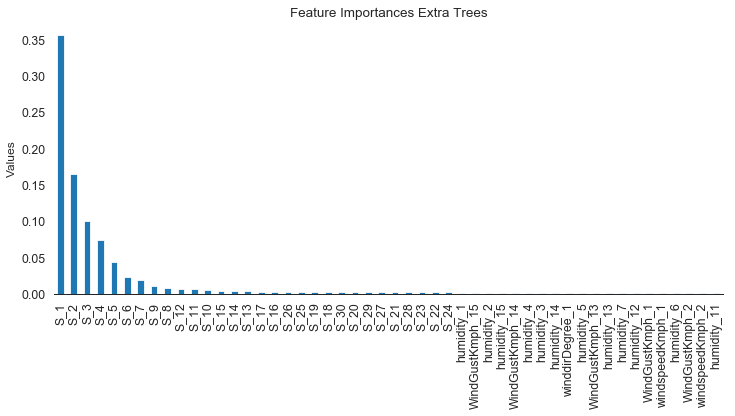

In [317]:
feature_indices = np.argsort(model.feature_importances_)

# Plot feature importance
fi = pd.DataFrame(index=names[feature_indices], data=np.sort(model.feature_importances_))
fi.sort_values(by=0, ascending=False, inplace=True)
ax = fi[:50].plot(kind="bar", title="Feature Importances Extra Trees", figsize=(12, 5))
ax.set_ylabel("Values", fontsize="large")
sns.despine(left=True)
ax.legend_.remove()

**2. Feature Importance - XGBoost**

In [27]:
import xgboost as xgb 
model = xgb.XGBRegressor(n_estimators = 100,max_depth=5)
#model = RandomForestRegressor(n_estimators = 100)

model.fit(X_train, y_train)

[23:48:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

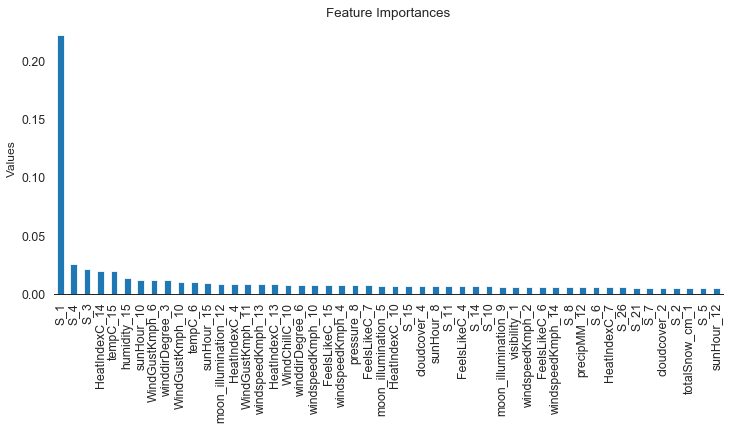

In [239]:
feature_indices = np.argsort(model.feature_importances_)

# Plot feature importance
fi = pd.DataFrame(index=names[feature_indices], data=np.sort(model.feature_importances_))
fi.sort_values(by=0, ascending=False, inplace=True)
ax = fi[:50].plot(kind="bar", title="Feature Importances", figsize=(12, 5))
ax.set_ylabel("Values", fontsize="large")
sns.despine(left=True)
ax.legend_.remove()

## Wrapper Approach: Sequential Feature Selection

SFAs remove or add one feature at the time based on the classifier performance until a feature subset of the desired size k is reached.

In [16]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from mlxtend.feature_selection import SequentialFeatureSelector

feature_selector = SequentialFeatureSelector(ExtraTreesRegressor(n_estimators=50,
                                                                 n_jobs=-1),
           k_features=50,
           forward=True,
           verbose=2,
           scoring='neg_mean_squared_error',
           cv=0)

In [17]:
import xgboost as xgb 
from mlxtend.feature_selection import SequentialFeatureSelector

feature_selector = SequentialFeatureSelector(xgb.XGBRegressor(n_estimators=70,max_depth=5,
                                                                 n_jobs=-1),
           k_features=60,
           forward=True,
           floating=True,
           verbose=2,
           scoring='neg_mean_squared_error',
           cv=0,
           n_jobs=-1)

In [18]:
features = feature_selector.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:   18.3s
[Parallel(n_jobs=-1)]: Done 333 tasks      | elapsed:   37.1s
[Parallel(n_jobs=-1)]: Done 510 out of 510 | elapsed:   54.3s finished

[2019-11-17 20:40:08] Features: 1/60 -- score: -6.675771267947544[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:   18.7s
[Parallel(n_jobs=-1)]: Done 333 tasks      | elapsed:   44.4s
[Parallel(n_jobs=-1)]: Done 509 out of 509 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.9s finished

[2019-11-17 20:41:16] Features: 2/60 -- score: -5.7749296241134065[Parallel(n_jobs=-1)]: Using backend LokyBackend wi


[2019-11-17 21:13:16] Features: 14/60 -- score: -4.822246028813637[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 333 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 496 out of 496 | elapsed:  3.9min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  14 | elapsed:    5.9s remaining:    5.9s
[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed:    6.1s finished

[2019-11-17 21:17:16] Features: 15/60 -- score: -4.8225764592856555[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 333 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 495 out of 

[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 333 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 484 out of 484 | elapsed:  5.7min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of  26 | elapsed:   10.6s remaining:   20.1s
[Parallel(n_jobs=-1)]: Done  23 out of  26 | elapsed:   17.9s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done  26 out of  26 | elapsed:   18.4s finished

[2019-11-17 22:18:26] Features: 27/60 -- score: -4.829258320219353[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 333 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 483 out of 483 | elapsed:  5.9min finished
[Parallel(n_jobs=-1)]: Using bac

[Parallel(n_jobs=-1)]: Done  18 out of  32 | elapsed:   24.4s remaining:   18.9s
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:   24.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  31 | elapsed:   12.6s remaining:   11.8s
[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:   24.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  30 | elapsed:   12.2s remaining:   12.2s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   23.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  29 | elapsed:   11.8s remaining:   14.6s
[Parallel(n_jobs=-1)]: Done  29 out of  29 | elapsed:   22.1s finished

[2019-11-17 23:25:57] Features: 30/60 -- score: -4.805131534019112[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=

[Parallel(n_jobs=-1)]: Done  34 out of  34 | elapsed:   33.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  33 | elapsed:   25.5s remaining:   18.7s
[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:   32.1s finished

[2019-11-18 00:40:28] Features: 34/60 -- score: -4.772469121054987[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 333 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 476 out of 476 | elapsed:  7.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  34 | elapsed:   26.8s remaining:   16.5s
[Parallel(n_jobs=-1)]: Done  34 out of  34 | elapsed:   33.7s finished

[2019-11-18 00:48:00] Features: 35/60 -- score: -4.772469121054987[Pa

[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 333 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 472 out of 472 | elapsed:  7.6min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  38 | elapsed:   29.5s remaining:   12.0s
[Parallel(n_jobs=-1)]: Done  38 out of  38 | elapsed:   37.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  37 | elapsed:   28.9s remaining:   13.8s
[Parallel(n_jobs=-1)]: Done  37 out of  37 | elapsed:   36.4s finished

[2019-11-18 02:14:38] Features: 38/60 -- score: -4.771679235595362[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:  2.3min
[Parallel(n_jobs=

[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   17.7s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 333 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 464 out of 464 | elapsed:  8.6min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   17.2s
[Parallel(n_jobs=-1)]: Done  39 out of  46 | elapsed:   49.9s remaining:    8.9s
[Parallel(n_jobs=-1)]: Done  46 out of  46 | elapsed:   50.3s finished

[2019-11-18 03:55:23] Features: 47/60 -- score: -4.771403629220185[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 333 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 463 out of 463 | elapsed:  8.8min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend wi

[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 333 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 455 out of 455 | elapsed:  9.8min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   20.0s
[Parallel(n_jobs=-1)]: Done  52 out of  55 | elapsed:  1.2min remaining:    4.0s
[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:  1.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   19.9s
[Parallel(n_jobs=-1)]: Done  51 out of  54 | elapsed:  1.2min remaining:    4.0s
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:  1.2min finished

[2019-11-18 05:53:41] Features: 55/60 -- score: -4.764842346470966[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=

In [23]:
filtered_features= names[list(features.k_feature_idx_)]
filtered_features

Index(['S_1', 'S_2', 'S_3', 'S_4', 'S_5', 'S_6', 'S_7', 'S_10', 'S_12', 'S_26',
       'totalSnow_cm_9', 'totalSnow_cm_10', 'totalSnow_cm_11',
       'totalSnow_cm_12', 'totalSnow_cm_13', 'totalSnow_cm_14',
       'totalSnow_cm_15', 'totalSnow_cm_16', 'totalSnow_cm_19',
       'totalSnow_cm_28', 'sunHour_2', 'sunHour_3', 'sunHour_4', 'sunHour_5',
       'sunHour_7', 'sunHour_9', 'sunHour_10', 'sunHour_11', 'sunHour_12',
       'sunHour_13', 'moon_illumination_26', 'moon_illumination_27',
       'moon_illumination_28', 'moon_illumination_30', 'DewPointC_12',
       'DewPointC_13', 'DewPointC_14', 'DewPointC_15', 'DewPointC_16',
       'DewPointC_17', 'DewPointC_18', 'DewPointC_19', 'DewPointC_20',
       'humidity_29', 'precipMM_4', 'precipMM_5', 'precipMM_6', 'precipMM_11',
       'precipMM_12', 'precipMM_14', 'pressure_20', 'tempC_27', 'visibility_2',
       'visibility_3', 'winddirDegree_27', 'windspeedKmph_23',
       'windspeedKmph_24', 'windspeedKmph_25', 'windspeedKmph_26',
     

In [21]:
#DataFrame Results
fs=pd.DataFrame.from_dict(feature_selector.get_metric_dict()).T
fs.to_csv('feature_Selection.csv')
fs.head()

C:\Users\Ali\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Ali\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,avg_score,ci_bound,cv_scores,feature_idx,feature_names,std_dev,std_err
1,-6.67577,NaN,[-6.675771267947544],"(0,)","(0,)",0,NaN
2,-5.77493,NaN,[-5.7749296241134065],"(0, 3)","(0, 3)",0,NaN
3,-5.43496,NaN,[-5.4349598215774],"(0, 2, 3)","(0, 2, 3)",0,NaN
4,-5.21942,NaN,[-5.219424003424216],"(0, 2, 3, 9)","(0, 2, 3, 9)",0,NaN
5,-5.13282,NaN,[-5.132815693415113],"(0, 2, 3, 6, 9)","(0, 2, 3, 6, 9)",0,NaN


In [46]:
#DataFrame Results
fs=pd.DataFrame.from_dict(feature_selector.get_metric_dict()).T
fs.to_csv('feature_Selection.csv')
fs.head()

C:\Users\Ali\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Ali\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,avg_score,ci_bound,cv_scores,feature_idx,feature_names,std_dev,std_err
1,-6.09671,NaN,[-6.096706231819744],"(0,)","(0,)",0,NaN
2,-5.31364,NaN,[-5.313640617799318],"(0, 3)","(0, 3)",0,NaN
3,-5.02722,NaN,[-5.0272190060652395],"(0, 3, 6)","(0, 3, 6)",0,NaN
4,-4.83,NaN,[-4.830004755440318],"(0, 2, 3, 6)","(0, 2, 3, 6)",0,NaN
5,-4.70259,NaN,[-4.702594317787003],"(0, 1, 2, 3, 6)","(0, 1, 2, 3, 6)",0,NaN


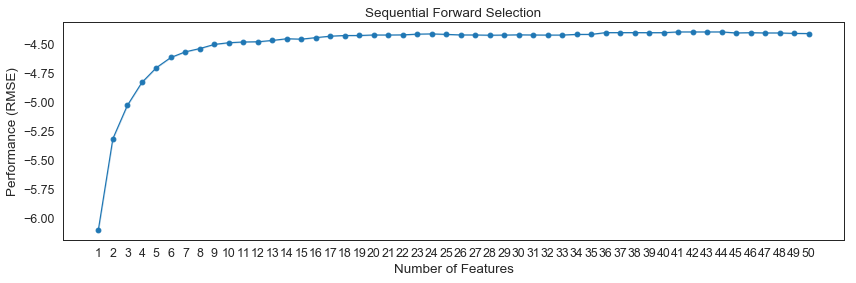

In [108]:
# Plot Results
sns.set_style('white')
sns.set_context("paper", font_scale=1.4)  

from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
fig = plot_sfs(features.get_metric_dict(), kind='std_dev', figsize=(14,4),
                ylabel='Performance (RMSE)',color='#1f77b4')

plt.title('Sequential Forward Selection')
#plt.xticks(np.arange(1, 51, 2))
for label in ax.get_xticklabels()[::2]:
    label.set_visible(False)
#sns.despine(left=True)
#plt.grid()

In [233]:
#Features RFE Forward selection using Extra Trees
RFE_Names=['S_1', 'S_15', 'totalSnow_cm_6', 'totalSnow_cm_7', 'totalSnow_cm_11',
       'totalSnow_cm_12', 'totalSnow_cm_14', 'sunHour_5',
       'moon_illumination_8', 'WindGustKmph_2', 'WindGustKmph_13',
       'cloudcover_2', 'cloudcover_3', 'cloudcover_4', 'cloudcover_5',
       'cloudcover_7', 'cloudcover_9', 'cloudcover_12', 'cloudcover_13',
       'cloudcover_15', 'humidity_2', 'humidity_3', 'humidity_4', 'humidity_5',
       'humidity_6', 'humidity_8', 'humidity_10', 'humidity_12', 'humidity_14',
       'humidity_15', 'precipMM_11', 'precipMM_14', 'precipMM_15',
       'visibility_2', 'visibility_3', 'visibility_4', 'visibility_6',
       'visibility_9', 'visibility_11', 'winddirDegree_1', 'winddirDegree_2',
       'winddirDegree_3', 'winddirDegree_4', 'winddirDegree_5',
       'winddirDegree_6', 'winddirDegree_14', 'winddirDegree_15',
       'windspeedKmph_13', 'windspeedKmph_14', 'windspeedKmph_15']

In [106]:
RFE_XGB=['S_1', 'S_2', 'S_3', 'S_4', 'S_5', 'S_6', 'S_7', 'S_8', 'S_10', 'S_15',
       'S_21', 'S_26', 'S_27', 'totalSnow_cm_8', 'totalSnow_cm_9',
       'totalSnow_cm_10', 'totalSnow_cm_11', 'totalSnow_cm_12',
       'totalSnow_cm_13', 'totalSnow_cm_14', 'totalSnow_cm_15', 'sunHour_1',
       'sunHour_2', 'sunHour_3', 'sunHour_4', 'sunHour_5', 'sunHour_6',
       'sunHour_7', 'sunHour_8', 'sunHour_9', 'sunHour_10', 'sunHour_11',
       'sunHour_12', 'sunHour_13', 'sunHour_14', 'HeatIndexC_12',
       'WindChillC_1', 'humidity_1', 'humidity_4', 'pressure_4']

RFE_XGB1=['S_1', 'S_3', 'S_5', 'S_9', 'totalSnow_cm_1', 'totalSnow_cm_2',
       'totalSnow_cm_3', 'totalSnow_cm_4', 'totalSnow_cm_7', 'totalSnow_cm_8',
       'totalSnow_cm_9', 'totalSnow_cm_10', 'totalSnow_cm_11',
       'totalSnow_cm_12', 'totalSnow_cm_13', 'totalSnow_cm_14',
       'totalSnow_cm_15', 'cloudcover_3', 'humidity_13', 'precipMM_3',
       'precipMM_4', 'precipMM_9', 'precipMM_10', 'precipMM_11', 'precipMM_12',
       'precipMM_13', 'precipMM_14', 'precipMM_15', 'visibility_1',
       'visibility_2', 'visibility_3', 'visibility_4', 'visibility_5',
       'visibility_6', 'visibility_7', 'visibility_8', 'visibility_9',
       'visibility_10', 'visibility_11', 'winddirDegree_10']

RFE_RF=['S_1', 'S_3', 'S_5', 'S_9', 'totalSnow_cm_1', 'totalSnow_cm_2',
       'totalSnow_cm_4', 'totalSnow_cm_7', 'totalSnow_cm_8', 'totalSnow_cm_9',
       'totalSnow_cm_10', 'totalSnow_cm_11', 'totalSnow_cm_12',
       'totalSnow_cm_14', 'totalSnow_cm_15', 'cloudcover_3', 'humidity_13',
       'precipMM_3', 'precipMM_9', 'precipMM_11', 'precipMM_13', 'precipMM_14',
       'precipMM_15', 'visibility_1', 'visibility_2', 'visibility_5',
       'visibility_7', 'visibility_9', 'visibility_10', 'winddirDegree_10']
F50=['S_1', 'S_2', 'S_3', 'S_4', 'S_5', 'S_6', 'S_7', 'S_8', 'S_10', 'S_13',
       'S_16', 'S_17', 'S_21', 'totalSnow_cm_1', 'totalSnow_cm_2',
       'totalSnow_cm_3', 'totalSnow_cm_4', 'totalSnow_cm_5', 'totalSnow_cm_7',
       'totalSnow_cm_8', 'totalSnow_cm_9', 'totalSnow_cm_10',
       'totalSnow_cm_11', 'sunHour_4', 'sunHour_7', 'sunHour_8', 'sunHour_14',
       'sunHour_15', 'moon_illumination_1', 'moon_illumination_2',
       'moon_illumination_3', 'moon_illumination_4', 'moon_illumination_5',
       'moon_illumination_6', 'moon_illumination_9', 'moon_illumination_10',
       'DewPointC_13', 'DewPointC_15', 'cloudcover_11', 'cloudcover_13',
       'cloudcover_15', 'humidity_8', 'humidity_13', 'precipMM_2',
       'precipMM_6', 'precipMM_9', 'precipMM_14', 'precipMM_15', 'pressure_9',
       'pressure_10']
RFE_Final=['S_1', 'S_2', 'S_3', 'S_4', 'S_5', 'S_7', 'S_8', 'S_10', 'S_12', 'S_21',
       'totalSnow_cm_1', 'totalSnow_cm_2', 'totalSnow_cm_3', 'totalSnow_cm_4',
       'totalSnow_cm_5', 'totalSnow_cm_6', 'totalSnow_cm_7', 'sunHour_2',
       'sunHour_4', 'sunHour_5', 'sunHour_6', 'sunHour_23', 'sunHour_24',
       'sunHour_28', 'moon_illumination_8', 'moon_illumination_9',
       'moon_illumination_10', 'moon_illumination_23', 'DewPointC_28',
       'cloudcover_7', 'cloudcover_15', 'cloudcover_18', 'cloudcover_19',
       'cloudcover_20', 'precipMM_3', 'precipMM_6', 'precipMM_12',
       'precipMM_14', 'precipMM_15', 'precipMM_16', 'precipMM_17',
       'precipMM_18', 'precipMM_19', 'precipMM_20', 'pressure_28',
       'pressure_29', 'visibility_28', 'visibility_29', 'winddirDegree_6',
       'winddirDegree_26']

In [112]:
dfsw.columns

Index(['datetime', 'speed', 'totalSnow_cm', 'sunHour', 'moon_illumination',
       'DewPointC', 'FeelsLikeC', 'HeatIndexC', 'WindChillC', 'WindGustKmph',
       'cloudcover', 'humidity', 'precipMM', 'pressure', 'tempC', 'visibility',
       'winddirDegree', 'windspeedKmph'],
      dtype='object')

**Selected Features 1:**

'totalSnow_cm', 'WindGustKmph', 'humidity', 'visibility',
       'winddirDegree', 'S_1', 'S_5', 'S_7', 'S_8', 'S_10', 'S_11', 'S_12',
       'S_13', 'S_14', 'S_15', 'S_16', 'S_17', 'S_18', 'S_19', 'S_20', 'S_21',
       'S_22', 'S_23', 'S_24', 'S_25', 'S_26', 'S_27', 'S_28', 'S_29', 'S_30'
       
       
'totalSnow_cm', 'humidity', 'visibility', 'winddirDegree', 'S_1', 'S_2',
       'S_4', 'S_5', 'S_6', 'S_7', 'S_9', 'S_12', 'S_13', 'S_14', 'S_15',
       'S_16', 'S_17', 'S_18', 'S_19', 'S_20', 'S_21', 'S_22', 'S_23', 'S_24',
       'S_25', 'S_26', 'S_27', 'S_28', 'S_29', 'S_30'

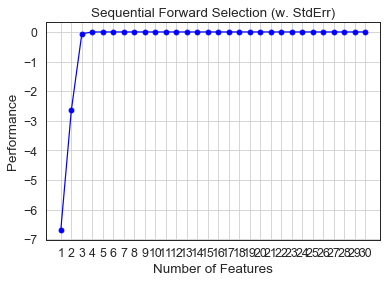

In [69]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
fig = plot_sfs(features.get_metric_dict(), kind='std_err')

plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show();

In [9]:
#fi for XGBoost
#names=list(fi.index[:50])
names=['totalSnow_cm', 'sunHour','cloudcover', 'humidity', 'precipMM','visibility','windspeedKmph']
names.insert(0,'speed') #Insert Speed at Index zero with selected features
names

['speed',
 'totalSnow_cm',
 'sunHour',
 'cloudcover',
 'humidity',
 'precipMM',
 'visibility',
 'windspeedKmph']

In [10]:
#data=data[[c for c in data.columns if c in names]]
#data=df_new.copy(deep=True)
dataw=dfsw.copy(deep=True)
dataw=dataw[[c for c in dataw.columns if c in names]]

In [74]:
dataw.head()

,speed,totalSnow_cm,sunHour,cloudcover,humidity,precipMM,visibility,windspeedKmph
1,8.700,0.0,11.6,6.00,53.0,0.0,10.0,10.00
2,8.700,0.0,11.6,6.25,51.5,0.0,10.0,10.25
3,8.700,0.0,11.6,6.50,50.0,0.0,10.0,10.50
4,8.545,0.0,11.6,6.75,48.5,0.0,10.0,10.75
5,9.010,0.0,11.6,7.00,47.0,0.0,10.0,11.00


In [30]:
X = data.iloc[:,:]
X=X.drop('speed',axis=1)
names=X.columns
X=X.values
y = data.loc[:,'speed']
y=y.values
#print(type(X),type(y))

In [25]:
# Time Series Validation

#train_size = int(len(data) * (0.85))
train_size = int(len(data) * (0.87))
#train_size = int(len(data) * (0.89))
#train_size = int(len(data) * (0.91))
#train_size = int(len(data) * (0.93))

test_size = len(data) - train_size

X_train, X_test = X[0:train_size,:], X[train_size:len(data),:]
y_train, y_test = y[0:train_size], y[train_size:len(data)]

# Scaling Features
scaler= MinMaxScaler(feature_range=(0,1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(69671, 50) (69671,) (10411, 50) (10411,)


In [422]:
# Speed Weather V1
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=180,max_depth=15,
                                min_samples_split=35,random_state=28)
regressor.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=35,
           min_weight_fraction_leaf=0.0, n_estimators=180, n_jobs=None,
           oob_score=False, random_state=28, verbose=0, warm_start=False)

In [442]:
from sklearn.ensemble import RandomForestRegressor
regressor=xgb.XGBRegressor(n_estimators=100,max_depth=15,
                                min_samples_split=35)
regressor.fit(X_train,y_train)

[18:24:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=15, min_child_weight=1, min_samples_split=35,
       missing=None, n_estimators=100, n_jobs=1, nthread=None,
       objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=None, silent=None, subsample=1,
       verbosity=1)

### XGBoost with Bayes Optimal Hyperparameters

In [101]:
from sklearn.ensemble import RandomForestRegressor
regressor=xgb.XGBRegressor(n_estimators=138, gamma=0.0, learning_rate=0.05,
                           max_depth=15,min_child_weight=8)
regressor.fit(X_train,y_train)

[19:10:11] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0.0,
       importance_type='gain', learning_rate=0.05, max_delta_step=0,
       max_depth=15, min_child_weight=8, missing=None, n_estimators=138,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [102]:
# Invert predictions and Reshape

#trainPredict = model.predict(X_train)
#testPredict = model.predict(X_test)

trainPredict = regressor.predict(X_train)
testPredict = regressor.predict(X_test)


# Metrics
print('\n---MAE---')
print('MAE Test: ',mean_absolute_error(y_test[:24], testPredict[:24]))
print('MAE Test: ',mean_absolute_error(y_test[:96], testPredict[:96]))
print('MAE Test: ',mean_absolute_error(y_test[:144], testPredict[:144]))

# Metrics
print('\n---RMSE---')
print('RMSE Test: ',np.sqrt(mean_squared_error(y_test[:24], testPredict[:24])))
print('RMSE Test: ',np.sqrt(mean_squared_error(y_test[:96], testPredict[:96])))
print('RMSE Test: ',np.sqrt(mean_squared_error(y_test[:144], testPredict[:144])))


# Metrics
print('\n---CV(RMSE)---')
print('CV(RMSE) Test: ',
      (np.sqrt(mean_squared_error(y_test[:24], testPredict[:24])))/(np.mean(y_test[:24])))
print('CV(RMSE) Test: ',
      (np.sqrt(mean_squared_error(y_test[:96], testPredict[:96])))/(np.mean(y_test[:96])))
print('CV(RMSE) Test: ',
      (np.sqrt(mean_squared_error(y_test[:144], testPredict[:144])))/(np.mean(y_test[:144])))


---MAE---
MAE Test:  0.823900267283122
MAE Test:  1.0314316833019253
MAE Test:  1.0750224322742885

---RMSE---
RMSE Test:  1.298696035735162
RMSE Test:  1.4418674042235369
RMSE Test:  1.5025356922153192

---CV(RMSE)---
CV(RMSE) Test:  0.07230543730170017
CV(RMSE) Test:  0.08938695210033938
CV(RMSE) Test:  0.08718951448852771


# DEEP Learning
### LSTM Model

In [27]:
from keras.models import Sequential
import matplotlib.patches as mpatches
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.callbacks import EarlyStopping, ModelCheckpoint
import time

from keras.layers import Dense,RepeatVector
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras_radam import RAdam
from keras.utils import multi_gpu_model
#from keras_self_attention import SeqSelfAttention

Using TensorFlow backend.


In [28]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4095050650684799719
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9121682555
locality {
  bus_id: 1
  links {
  }
}
incarnation: 7918241145585593865
physical_device_desc: "device: 0, name: GeForce RTX 2080 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5"
]


In [29]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']

In [61]:
#df4.to_csv('df4.csv')

In [222]:
data=df4.copy(deep=True)
data=data.values
data = data.astype('float32')
print('Original Shape: ',data.shape)
n_features = 1

# split into train and test sets
train_size = int(len(data) * (0.875))
test_size = len(data) - train_size
train, test = data[0:train_size,:], data[train_size:len(data),:]
print('Train Shape: ',train.shape)
print('Test Shape: ',test.shape)

scaler= MinMaxScaler(feature_range=(-1,1))
train=scaler.fit_transform(train)
test=scaler.transform(test)
print('Scaled Train Shape: ',train.shape)
print('Scaled Test Shape: ',test.shape)

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

# reshape into X=t and Y=t+1
look_back = 30
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)
print('\nSample Features')
print('LB X_train Shape: ',X_train.shape)
print('LB X_test Shape: ',X_test.shape)
print('LB y_train Shape: ',y_train.shape)
print('LB y_test Shape: ',y_test.shape)

# reshape input to be [samples, time steps, features]

X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],n_features))
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],n_features))

print('\nsamples, time steps, features')
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

Original Shape:  (80113, 1)
Train Shape:  (70098, 1)
Test Shape:  (10015, 1)
Scaled Train Shape:  (70098, 1)
Scaled Test Shape:  (10015, 1)

Sample Features
LB X_train Shape:  (70067, 30)
LB X_test Shape:  (9984, 30)
LB y_train Shape:  (70067,)
LB y_test Shape:  (9984,)

samples, time steps, features
(70067, 30, 1) (9984, 30, 1) (70067,) (9984,)


In [141]:
# Set callback functions to early stop training and save the best model so far
callbacks = [EarlyStopping(monitor='val_loss', patience=12),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

### Model 1 : Simple LSTM

In [223]:
# create and fit the LSTM network
model = Sequential() # New Instance of Model Object
model.add(LSTM(80, input_shape=(look_back,1)))
model.add(Dense(70, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='linear'))
#model.compile(loss='mean_squared_error', optimizer='ADAM')
model.compile(RAdam(), loss='mean_squared_error')

start = time.time()
hist =model.fit(X_train, y_train, epochs=100, shuffle=False,batch_size=64, validation_split=0.1, 
                callbacks=callbacks,
                verbose=1)

end = time.time()
# Training Phase
model.summary()

Train on 63060 samples, validate on 7007 samples
Epoch 1/100
63060/63060 [==============================] - 50s 799us/step - loss: 0.0199 - val_loss: 0.0201
Epoch 2/100
63060/63060 [==============================] - 48s 763us/step - loss: 0.0087 - val_loss: 0.0202
Epoch 3/100
63060/63060 [==============================] - 48s 757us/step - loss: 0.0084 - val_loss: 0.0194
Epoch 4/100
63060/63060 [==============================] - 48s 761us/step - loss: 0.0084 - val_loss: 0.0194
Epoch 5/100
63060/63060 [==============================] - 48s 766us/step - loss: 0.0083 - val_loss: 0.0192
Epoch 6/100
63060/63060 [==============================] - 48s 764us/step - loss: 0.0083 - val_loss: 0.0190
Epoch 7/100
63060/63060 [==============================] - 48s 764us/step - loss: 0.0082 - val_loss: 0.0186
Epoch 8/100
63060/63060 [==============================] - 48s 763us/step - loss: 0.0082 - val_loss: 0.0185
Epoch 9/100
63060/63060 [==============================] - 48s 764us/step - loss: 0.008

In [ ]:
# Invert predictions and Reshape

trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

trainPredict = scaler.inverse_transform(trainPredict)
y_train = scaler.inverse_transform([y_train])

testPredict = scaler.inverse_transform(testPredict)
y_test = scaler.inverse_transform([y_test])

y_train=y_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)

In [226]:
# Metrics for Simple & CNN-LSTM

print('---Full Model---')
print('MSE Train: ',mean_squared_error(y_train, trainPredict))
print('MSE Test: ',mean_squared_error(y_test, testPredict))

print('\nMAE Train: ',mean_absolute_error(y_train, trainPredict))
print('MAE Test: ',mean_absolute_error(y_test, testPredict))

print('\nRMSE Train: ',np.sqrt(mean_squared_error(y_train, trainPredict)))
print('RMSE Test: ',np.sqrt(mean_squared_error(y_test, testPredict)))

print('\nSDMAE Train: ',(mean_absolute_error(y_train, trainPredict))/(np.std(y_train)))
print('SDMAE Test: ',(mean_absolute_error(y_test, testPredict))/(np.std(y_test)))

print('CV(RMSE) Train: ',
      (np.sqrt(mean_squared_error(y_train, trainPredict)))/(np.mean(y_test)))
print('CV(RMSE) Test: ',
      (np.sqrt(mean_squared_error(y_test, testPredict)))/(np.mean(y_test)))


# Metrics
print('\n---MAE---')
print('MAE Test: ',mean_absolute_error(y_test[:24], testPredict[:24]))
print('MAE Test: ',mean_absolute_error(y_test[:48], testPredict[:48]))
print('MAE Test: ',mean_absolute_error(y_test[:96], testPredict[:96]))
print('MAE Test: ',mean_absolute_error(y_test[:144], testPredict[:144]))

# Metrics
print('\n---RMSE---')
print('RMSE Test: ',np.sqrt(mean_squared_error(y_test[:24], testPredict[:24])))
print('RMSE Test: ',np.sqrt(mean_squared_error(y_test[:48], testPredict[:48])))
print('RMSE Test: ',np.sqrt(mean_squared_error(y_test[:96], testPredict[:96])))
print('RMSE Test: ',np.sqrt(mean_squared_error(y_test[:144], testPredict[:144])))

# Metrics
print('\n---SDMAE---')
print('SDMAE Test: ',(mean_absolute_error(y_test[:24], testPredict[:24]))/(np.std(y_test[:24])))
print('SDMAE Test: ',(mean_absolute_error(y_test[:48], testPredict[:48]))/(np.std(y_test[:48])))
print('SDMAE Test: ',(mean_absolute_error(y_test[:96], testPredict[:96]))/(np.std(y_test[:96])))
print('SDMAE Test: ',(mean_absolute_error(y_test[:144], testPredict[:144]))/(np.std(y_test[:144])))


# Metrics
print('\n---CV(RMSE)---')
print('CV(RMSE) Test: ',
      (np.sqrt(mean_squared_error(y_test[:24], testPredict[:24])))/(np.mean(y_test[:24])))
print('CV(RMSE) Test: ',
      (np.sqrt(mean_squared_error(y_test[:48], testPredict[:48])))/(np.mean(y_test[:48])))
print('CV(RMSE) Test: ',
      (np.sqrt(mean_squared_error(y_test[:96], testPredict[:96])))/(np.mean(y_test[:96])))
print('CV(RMSE) Test: ',
      (np.sqrt(mean_squared_error(y_test[:144], testPredict[:144])))/(np.mean(y_test[:144])))

---Full Model---
MSE Train:  6.585387181396348
MSE Test:  3.8203483763308204

MAE Train:  1.6891394677583063
MAE Test:  1.398731493506686

RMSE Train:  2.5662009238164396
RMSE Test:  1.9545711489559086

SDMAE Train:  0.321521786415756
SDMAE Test:  0.30892308085501385
CV(RMSE) Train:  0.16685293905300502
CV(RMSE) Test:  0.127085115496915

---MAE---
MAE Test:  1.2779253406567985
MAE Test:  1.5265630084832635
MAE Test:  1.5435526094808338
MAE Test:  1.4762770383089248

---RMSE---
RMSE Test:  2.353918091212857
RMSE Test:  2.6352334748334
RMSE Test:  2.3897302566237686
RMSE Test:  2.233571575831121

---SDMAE---
SDMAE Test:  0.4796934807841789
SDMAE Test:  0.39019028724152255
SDMAE Test:  0.29770814835456144
SDMAE Test:  0.308212578119655

---CV(RMSE)---
CV(RMSE) Test:  0.12562046051877843
CV(RMSE) Test:  0.12953395880984117
CV(RMSE) Test:  0.1442692670463335
CV(RMSE) Test:  0.1302949164549651


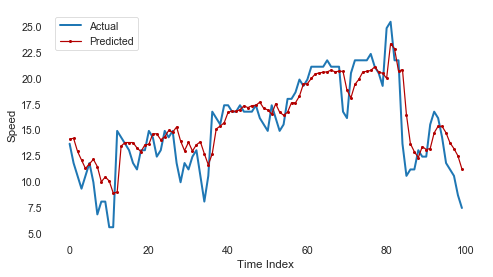

In [144]:
sns.set_style('white')
sns.set_context("paper", font_scale=1.2)  
fig = plt.figure(figsize=(7,4))
ax = plt.axes()


ax.plot(y_test[50:150], linewidth=2, color='#1f77b4', label = "Actual") 
ax.plot(testPredict[50:150], linewidth=1.2, color='#b30000', marker='o', markersize=2, 
         label = "Predicted")
plt.box(on=False)
ax.legend(loc='best')
plt.xlabel('Time Index')
plt.ylabel('Speed')
sns.despine(left=True, bottom=False)
plt.tight_layout()
#plt.savefig('Fig1.png', bbox_inches='tight', dpi=300)

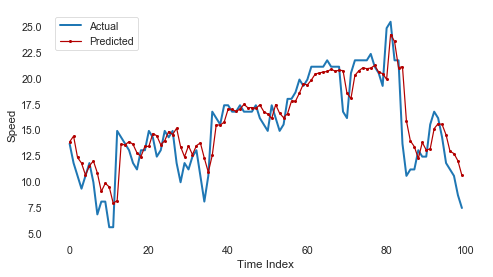

In [136]:
sns.set_style('white')
sns.set_context("paper", font_scale=1.2)  
fig = plt.figure(figsize=(7,4))
ax = plt.axes()


ax.plot(y_test[50:150], linewidth=2, color='#1f77b4', label = "Actual") 
ax.plot(testPredict[50:150], linewidth=1.2, color='#b30000', marker='o', markersize=2, 
         label = "Predicted")
plt.box(on=False)
ax.legend(loc='best')
plt.xlabel('Time Index')
plt.ylabel('Speed')
sns.despine(left=True, bottom=False)
plt.tight_layout()
#plt.savefig('Fig1.png', bbox_inches='tight', dpi=300)

**Save Model**

In [ ]:
from keras.models import load_model

#model.save('LSTM_Simple.h5')  # creates a HDF5 file 'my_model.h5'
model.save('LSTM_Multivariate.h5')
#del model  # deletes the existing model

# returns a compiled model
# identical to the previous one
#model = load_model('my_model.h5')

In [ ]:
from keras.models import load_model
del model
model = load_model('LSTM_Simple_RAdam1.h5')

### Model 2: UNIVARIATE CNN-LSTM

In [39]:
## UNIVARIATE CNN-LSTM
model = Sequential()
# add conv1D layer
model.add(Conv1D(filters=64, kernel_size=2, 
                 activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))

#model.add(Conv1D(filters=32, kernel_size=2, activation='relu'))

#model.add(Dropout(0.01))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(80, input_shape=(look_back,1)))
#model.add(Dropout(0.01))
model.add(Dense(70, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='linear'))
#model.compile(loss='mean_squared_error', optimizer='ADAM')
model.compile(RAdam(), loss='mean_squared_error')

start = time.time()
hist =model.fit(X_train, y_train, epochs=100, shuffle=False,batch_size=64, validation_split=0.1, 
                callbacks=callbacks,
                verbose=1)

Train on 63060 samples, validate on 7007 samples
Epoch 1/100
63060/63060 [==============================] - 33s 520us/step - loss: 0.0201 - val_loss: 0.0230
Epoch 2/100
63060/63060 [==============================] - 31s 486us/step - loss: 0.0132 - val_loss: 0.0230
Epoch 3/100
63060/63060 [==============================] - 31s 486us/step - loss: 0.0129 - val_loss: 0.0233
Epoch 4/100
63060/63060 [==============================] - 31s 486us/step - loss: 0.0127 - val_loss: 0.0247
Epoch 5/100
63060/63060 [==============================] - 31s 487us/step - loss: 0.0125 - val_loss: 0.0237
Epoch 6/100
63060/63060 [==============================] - 31s 487us/step - loss: 0.0123 - val_loss: 0.0240
Epoch 7/100
63060/63060 [==============================] - 31s 487us/step - loss: 0.0122 - val_loss: 0.0227
Epoch 8/100
63060/63060 [==============================] - 31s 485us/step - loss: 0.0120 - val_loss: 0.0230
Epoch 9/100
63060/63060 [==============================] - 31s 487us/step - loss: 0.012

## MultiVariate Models

In [187]:
#convert data to supervised form

def to_supervised(data,dropNa = True,lag = 1):
    df = pd.DataFrame(data)
    column = []
    column.append(df)
    for i in range(1,lag+1):
        column.append(df.shift(-i))
    df = pd.concat(column,axis=1)
    df.dropna(inplace = True)
    features = data.shape[1]
    df = df.values
    supervised_data = df[:,:features*lag]
    supervised_data = np.column_stack( [supervised_data, df[:,features*lag]])
    return supervised_data

In [188]:
features=dataw.shape[1]
timeSteps = 30
supervised = to_supervised(dataw,lag=timeSteps)
df=pd.DataFrame(supervised)

data1=df.values
data1 = data1.astype('float32')
print('Original Shape: ',dataw.shape)

# split into train and test sets
train_size = int(len(data1) * (0.875))
test_size = len(data1) - train_size
train, test = data1[0:train_size,:], data1[train_size:len(data1),:]
print('Train Shape: ',train.shape)
print('Test Shape: ',test.shape)

X_train = train[:,1:]
y_train = train[:,0]

X_test = test[:,1:]
y_test = test[:,0]

scaler= MinMaxScaler(feature_range=(-1,1))
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
print('Scaled Train Shape: ',train.shape)
print('Scaled Test Shape: ',test.shape)

Original Shape:  (80112, 7)
Train Shape:  (70071, 211)
Test Shape:  (10011, 211)
Scaled Train Shape:  (70071, 211)
Scaled Test Shape:  (10011, 211)


In [189]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((70071, 210), (70071,), (10011, 210), (10011,))

In [190]:
#convert data to fit for lstm
#dimensions = (sample, timeSteps here it is 1, features )

X_train = X_train.reshape(X_train.shape[0], timeSteps, features)
X_test = X_test.reshape(X_test.shape[0], timeSteps, features)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((70071, 30, 7), (70071,), (10011, 30, 7), (10011,))

### MODEL 3: Vanilla LSTM fot MultiVariate Inputs

In [50]:
# create and fit the LSTM network for MultiSequence Inputs
model = Sequential() # New Instance of Model Object
model.add(LSTM(100, input_shape=(30,7)))
model.add(Dense(70, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='linear'))
#model.compile(loss='mean_squared_error', optimizer='ADAM')
model.compile(RAdam(), loss='mean_squared_error')

start = time.time()
hist =model.fit(X_train, y_train, epochs=100, shuffle=False,batch_size=64, validation_split=0.1, 
                callbacks=callbacks,
                verbose=1)

end = time.time()
# Training Phase
model.summary()

Train on 63784 samples, validate on 7088 samples
Epoch 1/100
63784/63784 [==============================] - 44s 687us/step - loss: 51.5982 - val_loss: 35.1360
Epoch 2/100
63784/63784 [==============================] - 43s 672us/step - loss: 27.4063 - val_loss: 35.8505
Epoch 3/100
63784/63784 [==============================] - 43s 672us/step - loss: 27.7323 - val_loss: 36.7674
Epoch 4/100
63784/63784 [==============================] - 43s 672us/step - loss: 27.7867 - val_loss: 40.3525
Epoch 5/100
63784/63784 [==============================] - 43s 671us/step - loss: 27.7628 - val_loss: 42.7750
Epoch 6/100
63784/63784 [==============================] - 43s 673us/step - loss: 27.7488 - val_loss: 41.1167
Epoch 7/100
63784/63784 [==============================] - 43s 672us/step - loss: 27.7534 - val_loss: 45.2479
Epoch 8/100
63784/63784 [==============================] - 43s 671us/step - loss: 27.3221 - val_loss: 39.9280
Epoch 9/100
63784/63784 [==============================] - 43s 672us/st

In [191]:
# Invert predictions and Reshape Multivariate LSTM Vanilla
trainPredict = model1.predict(X_train)
testPredict = model1.predict(X_test)

In [197]:
a=np.quantile(y_test,0.98)
a1=np.quantile(y_test,0.97)
b=np.quantile(y_test,0.07)
b1=np.quantile(y_test,0.06)

In [198]:
y_test1=y_test.copy()

In [199]:
y_test1[y_test1>a]=a1
y_test1[y_test1<b]=b1

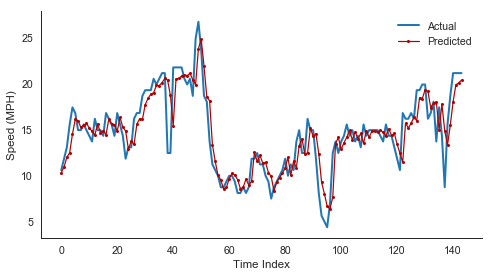

In [44]:
sns.set_style('white')
sns.set_context("paper", font_scale=1.2)  
fig = plt.figure(figsize=(7,4))
ax = plt.axes()


ax.plot(y_test[0:144], linewidth=2, color='#1f77b4', label = "Actual") 
ax.plot(testPredict[0:144], linewidth=1.2, color='#b30000', marker='o', markersize=2, 
         label = "Predicted")
ax.legend(loc='best', frameon=False)
plt.xlabel('Time Index')
plt.ylabel('Speed (MPH)')
sns.despine(top=True)
plt.tight_layout()
plt.savefig('Fig2.png', bbox_inches='tight', dpi=300)

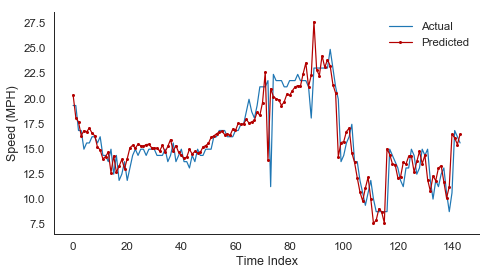

In [219]:
sns.set_style('white')
sns.set_context("paper", font_scale=1.3)  
fig = plt.figure(figsize=(7,4))
ax = plt.axes()


ax.plot(y_test1[1:145], linewidth=1.2, color='#1f77b4', label = "Actual") 
ax.plot(testPredict[1:145], linewidth=1.2, color='#b30000', marker='o', markersize=2, 
         label = "Predicted")
#plt.box(on=False)
ax.legend(loc='best',frameon=False)
plt.xlabel('Time Index')
plt.ylabel('Speed (MPH)')
sns.despine(top=True)
plt.tight_layout()
plt.savefig('Fig2.png', bbox_inches='tight', dpi=350)

In [ ]:
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [76]:
# Metrics for Simple & CNN-LSTM

print('---Full Model---')
print('MSE Train: ',mean_squared_error(y_train, trainPredict))
print('MSE Test: ',mean_squared_error(y_test, testPredict))

print('\nMAE Train: ',mean_absolute_error(y_train, trainPredict))
print('MAE Test: ',mean_absolute_error(y_test, testPredict))

print('\nRMSE Train: ',np.sqrt(mean_squared_error(y_train, trainPredict)))
print('RMSE Test: ',np.sqrt(mean_squared_error(y_test, testPredict)))

print('\nSDMAE Train: ',(mean_absolute_error(y_train, trainPredict))/(np.std(y_train)))
print('SDMAE Test: ',(mean_absolute_error(y_test, testPredict))/(np.std(y_test)))

print('CV(RMSE) Test: ',
      (np.sqrt(mean_squared_error(y_test, testPredict)))/(np.mean(y_test)))


# Metrics
print('\n---MAE---')
print('MAE Test: ',mean_absolute_error(y_test[:24], testPredict[:24]))
print('MAE Test: ',mean_absolute_error(y_test[:48], testPredict[:48]))
print('MAE Test: ',mean_absolute_error(y_test[:96], testPredict[:96]))
print('MAE Test: ',mean_absolute_error(y_test[:144], testPredict[:144]))

# Metrics
print('\n---RMSE---')
print('RMSE Test: ',np.sqrt(mean_squared_error(y_test[:24], testPredict[:24])))
print('RMSE Test: ',np.sqrt(mean_squared_error(y_test[:48], testPredict[:48])))
print('RMSE Test: ',np.sqrt(mean_squared_error(y_test[:96], testPredict[:96])))
print('RMSE Test: ',np.sqrt(mean_squared_error(y_test[:144], testPredict[:144])))

# Metrics
print('\n---SDMAE---')
print('SDMAE Test: ',(mean_absolute_error(y_test[:24], testPredict[:24]))/(np.std(y_test[:24])))
print('SDMAE Test: ',(mean_absolute_error(y_test[:48], testPredict[:48]))/(np.std(y_test[:48])))
print('SDMAE Test: ',(mean_absolute_error(y_test[:96], testPredict[:96]))/(np.std(y_test[:96])))
print('SDMAE Test: ',(mean_absolute_error(y_test[:144], testPredict[:144]))/(np.std(y_test[:144])))


# Metrics
print('\n---CV(RMSE)---')
print('CV(RMSE) Test: ',
      (np.sqrt(mean_squared_error(y_test[:24], testPredict[:24])))/(np.mean(y_test[:24])))
print('CV(RMSE) Test: ',
      (np.sqrt(mean_squared_error(y_test[:48], testPredict[:48])))/(np.mean(y_test[:48])))
print('CV(RMSE) Test: ',
      (np.sqrt(mean_squared_error(y_test[:96], testPredict[:96])))/(np.mean(y_test[:96])))
print('CV(RMSE) Test: ',
      (np.sqrt(mean_squared_error(y_test[:144], testPredict[:144])))/(np.mean(y_test[:144])))

---Full Model---
MSE Train:  6.590385
MSE Test:  4.187937

MAE Train:  1.6241521
MAE Test:  1.4247234

RMSE Train:  2.5671744
RMSE Test:  2.046445

SDMAE Train:  0.30895057
SDMAE Test:  0.31526363
CV(RMSE) Test:  0.13300575

---MAE---
MAE Test:  1.047129
MAE Test:  0.86430234
MAE Test:  1.2328792
MAE Test:  1.3676528

---RMSE---
RMSE Test:  1.3049254
RMSE Test:  1.094545
RMSE Test:  2.142541
RMSE Test:  2.2208369

---SDMAE---
SDMAE Test:  0.49241638
SDMAE Test:  0.5408324
SDMAE Test:  0.31013897
SDMAE Test:  0.30965084

---CV(RMSE)---
CV(RMSE) Test:  0.08647617
CV(RMSE) Test:  0.07424944
CV(RMSE) Test:  0.12405544
CV(RMSE) Test:  0.13993381


### MODEL 4: CNN-LSTM Model

In [124]:
## WORKING
model1 = Sequential()
# add conv1D layer
model1.add(Conv1D(filters=64, kernel_size=2, 
                 activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))

model1.add(Conv1D(filters=32, kernel_size=2, activation='relu'))

#model.add(Dropout(0.01))
model1.add(MaxPooling1D(pool_size=2))
model1.add(LSTM(70, input_shape=(look_back,1)))
#model.add(Dropout(0.01))
model1.add(Dense(70, activation='relu'))
model1.add(Dense(40, activation='relu'))
model1.add(Dense(20, activation='relu'))
model1.add(Dense(1, activation='linear'))
#model.compile(loss='mean_squared_error', optimizer='ADAM')
model1.compile(RAdam(), loss='mean_squared_error')

start = time.time()
hist =model1.fit(X_train, y_train, epochs=100, shuffle=False,batch_size=64, validation_split=0.1, 
                callbacks=callbacks,
                verbose=1)

Train on 63063 samples, validate on 7008 samples
Epoch 1/100
63063/63063 [==============================] - 27s 428us/step - loss: 49.7061 - val_loss: 79.5884
Epoch 2/100
63063/63063 [==============================] - 25s 394us/step - loss: 27.5496 - val_loss: 80.7195
Epoch 3/100
63063/63063 [==============================] - 25s 394us/step - loss: 19.1424 - val_loss: 27.2245
Epoch 4/100
63063/63063 [==============================] - 25s 393us/step - loss: 8.7487 - val_loss: 21.4162
Epoch 5/100
63063/63063 [==============================] - 25s 394us/step - loss: 7.5228 - val_loss: 29.1307
Epoch 6/100
63063/63063 [==============================] - 25s 393us/step - loss: 6.8799 - val_loss: 23.4085
Epoch 7/100
63063/63063 [==============================] - 25s 395us/step - loss: 6.5150 - val_loss: 23.4249
Epoch 8/100
63063/63063 [==============================] - 25s 395us/step - loss: 6.3564 - val_loss: 23.6050
Epoch 9/100
63063/63063 [==============================] - 25s 394us/step - 

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from bayes_opt import BayesianOptimization

def validate(n_estimators, min_samples_split, max_depth):
    model = RandomForestRegressor(n_estimators=int(n_estimators), 
                                  min_samples_split=int(min_samples_split),
                                  max_depth=int(max_depth),random_state=42)
    
    result = -cross_val_score(model, X_train, y_train,
                              scoring='neg_mean_squared_error',
                              cv=3, n_jobs=-1)
    result = np.sqrt(result)
    return -result.mean()

pbounds = {
    'n_estimators': (75 ,220),
    'min_samples_split': (2,35),
    'max_depth': (15,40)
}

optimizer = BayesianOptimization(f=validate, pbounds=pbounds)
optimizer.maximize(init_points=6, n_iter=10, acq='ucb')

**4. Stacked LSTM**
* Multiple hidden LSTM layers can be stacked one on top of another in what is referred to as a Stacked LSTM model.
* A LSTM layer requires a three-dimensional input and LSTMs by default will produce a two-dimensional output as an interpretation from the end of the sequence.
* Setting the return sequences=True argument on the layer allows us to have 3D output from hidden LSTM layer as input to the next.

In [ ]:
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape=(None, n_steps, n_features)))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

## AutoEncoder Model
- Autoencoders are a type of self-supervised learning model that can learn a compressed representation of input data.
- LSTM Autoencoders can learn a compressed representation of sequence data and have been used on video, text, audio, and time series sequence data.

Input Dimensions 50
Train on 69671 samples, validate on 10411 samples
Epoch 1/10
69671/69671 [==============================] - 4s 51us/step - loss: 0.0363 - val_loss: 0.0341
Epoch 2/10
69671/69671 [==============================] - 3s 44us/step - loss: 0.0347 - val_loss: 0.0346
Epoch 3/10
69671/69671 [==============================] - 3s 42us/step - loss: 0.0339 - val_loss: 0.0343
Epoch 4/10
69671/69671 [==============================] - 3s 49us/step - loss: 0.0222 - val_loss: 0.0103
Epoch 5/10
69671/69671 [==============================] - 3s 45us/step - loss: 0.0081 - val_loss: 0.0103
Epoch 6/10
69671/69671 [==============================] - 3s 37us/step - loss: 0.0079 - val_loss: 0.0107
Epoch 7/10
69671/69671 [==============================] - 3s 41us/step - loss: 0.0075 - val_loss: 0.0107
Epoch 8/10
69671/69671 [==============================] - 3s 40us/step - loss: 0.0086 - val_loss: 0.0095
Epoch 9/10
69671/69671 [==============================] - 3s 41us/step - loss: 0.0076 - va

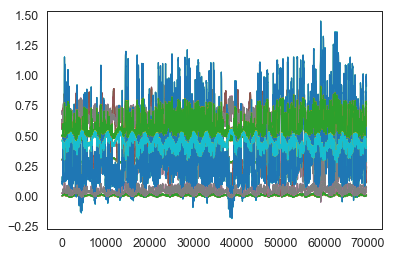

In [39]:
from keras.layers import Input, Dense
from keras.models import Model

input_dim = X_train.shape[1]
feature_dim = [30, 18, 8]
print('Input Dimensions',input_dim)
inputs = Input(shape=(input_dim,))
encoded = inputs
encoded = Dense(feature_dim[0], kernel_initializer="uniform")(encoded)
encoded = Dense(feature_dim[1], kernel_initializer="uniform")(encoded)
encoded = Dense(feature_dim[2], kernel_initializer="uniform")(encoded)

decoded = encoded
decoded = Dense(feature_dim[1], kernel_initializer="uniform")(decoded)
decoded = Dense(feature_dim[0], kernel_initializer="uniform")(decoded)
decoded = Dense(input_dim, kernel_initializer="uniform")(decoded)


autoencoder = Model(inputs, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

autoencoder.fit(X_train, X_train,
                verbose=1,
                epochs=10,
                batch_size=32,
                shuffle=False,
                validation_data=(X_test, X_test))

predict_vals = autoencoder.predict(X_train)
print('Prediction Shape',predict_vals.shape)
plt.plot(predict_vals)
plt.show()

In [45]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 50)                0         
_________________________________________________________________
dense_27 (Dense)             (None, 30)                1530      
_________________________________________________________________
dense_28 (Dense)             (None, 18)                558       
_________________________________________________________________
dense_29 (Dense)             (None, 8)                 152       
_________________________________________________________________
dense_30 (Dense)             (None, 18)                162       
_________________________________________________________________
dense_31 (Dense)             (None, 30)                570       
_________________________________________________________________
dense_32 (Dense)             (None, 50)                1550      
Total para

In [49]:
featuremodel = Sequential()
featuremodel.add(Dense(feature_dim[0], input_shape=(input_dim,),
                       weights=autoencoder.layers[1].get_weights()))

featuremodel.add(Dense(feature_dim[1], weights=autoencoder.layers[2].get_weights()))

featuremodel.add(Dense(feature_dim[2], weights=autoencoder.layers[3].get_weights()))

featuremodel.compile(optimizer='adam', loss='mse')

In [50]:
X_train1=featuremodel.predict(X_train)

In [51]:
X_train1.shape

(69671, 8)

In [33]:
X1=featuremodel.predict(X)

**Example**

In [ ]:
## Let's train a SVM with the weights lerned by the autoencoder and the original features!!!

# classic svm with linear kernel
model = svm.SVC(kernel='linear')
model.fit(train_data, train_target)
prediction=model.predict(test_data)
print("Accuracy svm: %s" % "{0:.3%}".format(metrics.accuracy_score(prediction, test_target)))

# classic svm with deep autoencoder and linear kernel
deepmodel = svm.SVC(kernel='linear')
deepmodel.fit(featuremodel.predict(n_train),train_target)
deepprediction=deepmodel.predict(featuremodel.predict(n_test))
print("Accuracy d-svm: %s" % "{0:.3%}".format(metrics.accuracy_score(deepprediction, test_target)))

In [53]:
X_train.shape, X_train1.shape

((69671, 50), (69671, 8))

In [ ]:
# create and fit the LSTM network
model = Sequential() # New Instance of Model Object
model.add(LSTM(20, input_shape=(look_back,1)))
model.add(Dense(60, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='ADAM')

start = time.time()
hist =model.fit(X_train, y_train, epochs=10, shuffle=False,batch_size=64, validation_split=0.1, 
                callbacks=[EarlyStopping(monitor='val_loss', patience=30)],
                verbose=1)

end = time.time()
# Training Phase
model.summary()

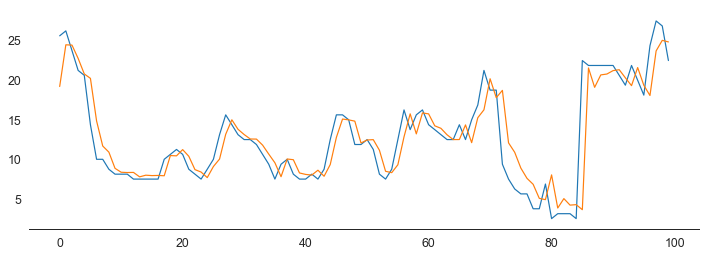

In [159]:
plt.figure(figsize=(12,4))
plt.plot(Ytest[:100])
plt.plot(test_predict[:100])
sns.despine(left=True)

In [27]:
def model(x_train, y_train):
    model = Sequential()
    model.add(LSTM(50, input_shape = (x_train.shape[1], 1),
                   activation='relu', return_sequences = True))
    model.add(SeqSelfAttention(attention_activation='relu'))
    model.add(LSTM(units = 50))
    model.add(Dense(units=1))
    model.compile(optimizer = 'adam', loss = 'mean_squared_error')

    train_history = model.fit(x_train, y_train, epochs = 10, batch_size = 64,
                              validation_split=0.1)
    
    return model, train_history

## SELF ATTENTION
* Attention mechanism for processing sequential data that considers the context for each timestamp.
* By default, the attention layer uses additive attention and considers the whole context while calculating the relevance.

In [35]:
SeqSelfAttention()

keras_self_attention.seq_self_attention.SeqSelfAttention

In [43]:
# TRY
def model(x_train, y_train):
    model = Sequential()
    model.add(LSTM(50, input_shape = (x_train.shape[1], 1),
                   activation='relu', return_sequences = True))
    model.add(SeqSelfAttention(attention_width=10,attention_activation='relu',
                               attention_type=
                               SeqSelfAttention.ATTENTION_TYPE_MUL))
    model.add(LSTM(units = 50))
    model.add(Dropout(0.1))
    model.add(Dense(units=10))
    model.add(Dense(units=1))
    model.compile(optimizer = 'adam', loss = 'mean_squared_error')

    train_history = model.fit(x_train, y_train, epochs = 1, batch_size = 64,
                              validation_split=0.1)
    
    return model, train_history

In [44]:
model, train_history = model(X_train , y_train)

W0914 20:40:16.745359 15980 deprecation.py:506] From C:\Users\Ali\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Train on 63782 samples, validate on 7087 samples
Epoch 1/1
63782/63782 [==============================] - 58s 914us/step - loss: 0.0154 - val_loss: 0.0175


In [39]:
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()

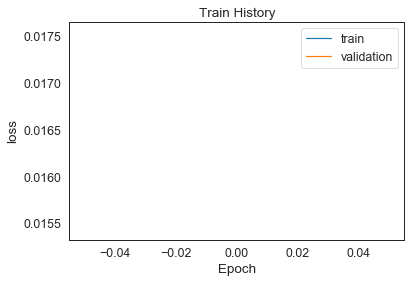

In [45]:
show_train_history(train_history,'loss','val_loss')

In [147]:
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

In [149]:
import math

In [153]:
y_train[0]

-0.9303762

In [155]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train, trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test, testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

from sklearn.metrics import mean_absolute_error
print('Mean Absolute Error:', mean_absolute_error(y_test, testPredict[:,0]))
print('Mean Squared Error:',np.sqrt(mean_squared_error(y_test, testPredict[:,0])))
#print('Mean Absolute Percentage Error:',MAPError(testY[0], testPredict[:,0]))

Train Score: 0.09 RMSE
Test Score: 0.07 RMSE
Mean Absolute Error: 0.046217576
Mean Squared Error: 0.06851617


In [160]:
print('Error Metrics with Attention LSTM')

train_predict = model.predict(X_train)
train_predict = scaler.inverse_transform(train_predict)

test_predict = model.predict(X_test)
test_predict = scaler.inverse_transform(test_predict)


Ytest=np.asanyarray(y_test)  
Ytest=Ytest.reshape(-1,1) 
Ytest = scaler.inverse_transform(Ytest)


Ytrain=np.asanyarray(y_train)  
Ytrain=Ytrain.reshape(-1,1) 
Ytrain = scaler.inverse_transform(Ytrain)


print('MSE Train: ',np.sqrt(mean_squared_error(Ytrain, train_predict)))
print('MSE Test: ',np.sqrt(mean_squared_error(Ytest, test_predict)))

print('\nMAE Train: ',mean_absolute_error(Ytrain, train_predict))
print('MAE Test: ',mean_absolute_error(Ytest, test_predict))



Error Metrics with Attention LSTM
MSE Train:  2.4880958
MSE Test:  1.8304096

MAE Train:  1.4067485
MAE Test:  1.2347026


In [161]:
trainScore = math.sqrt(mean_squared_error(y_train, trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test, testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.09 RMSE
Test Score: 0.07 RMSE
